In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install geopandas
!pip install pyshp
!pip install shapely

In [4]:
pip install plotly-geo

Note: you may need to restart the kernel to use updated packages.


In [5]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import geopandas as gpd
import json
import plotly.figure_factory as ff
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from matplotlib.ticker import PercentFormatter



pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [6]:
ky_debt_data = pd.read_excel('./data/sw-Debt-in-America-Data.xlsx', sheet_name="sw - Medical Debt - KY - County")
ky_debt_data.head()

Unnamed: 0 Unnamed: 1 Share with debt in collections   Unnamed: 3  \
0           County      State                        Overall  White areas   
1     Adair County   Kentucky                           0.41         0.41   
2     Allen County   Kentucky                           0.41         0.41   
3  Anderson County   Kentucky                           0.32         0.32   
4   Ballard County   Kentucky                           0.32         0.32   

       Unnamed: 4 Median debt in collections   Unnamed: 6      Unnamed: 7  \
0  Nonwhite areas                    Overall  White areas  Nonwhite areas   
1           n/a**                       1636         1636           n/a**   
2           n/a**                       2198         2198           n/a**   
3           n/a**                       1119         1119           n/a**   
4           n/a**                       n/a*         n/a*           n/a**   

  Share with medical debt in collections   Unnamed: 9     Unnamed: 10  \
0                                Overall  White areas  Nonwhite areas   
1                                   0.29         0.29           n/a**   
2                                   0.35         0.35           n/a**   
3                                   0.24         0.24           n/a**   
4                                   0.23         0.23           n/a**   

  Median medical debt in collections  Unnamed: 12     Unnamed: 13  \
0                            Overall  White areas  Nonwhite areas   
1                                767          767           n/a**   
2                               1200         1200           n/a**   
3                                744          744           n/a**   
4                               n/a*         n/a*           n/a**   

   Nonwhite population share Share without health insurance coverage  \
0                        NaN                                 Overall   
1                       0.06                                    0.15   
2                       0.04                                    0.16   
3                       0.06                                    0.09   
4                       0.07                                    0.12   

  Unnamed: 16 Unnamed: 17 Average household income Unnamed: 19 Unnamed: 20  
0       White    Nonwhite                  Overall       White    Nonwhite  
1        0.14        0.27                    45573       45942       38559  
2        0.16        0.28                    52779       51598       88920  
3        0.09        0.06                    61426       61528       58865  
4        0.12        0.21                    58182       59729       30831

In [7]:
ky_debt_data = ky_debt_data.iloc[1:,]
ky_debt_data.head()

Unnamed: 0 Unnamed: 1 Share with debt in collections Unnamed: 3  \
1     Adair County   Kentucky                           0.41       0.41   
2     Allen County   Kentucky                           0.41       0.41   
3  Anderson County   Kentucky                           0.32       0.32   
4   Ballard County   Kentucky                           0.32       0.32   
5    Barren County   Kentucky                           0.41       0.41   

  Unnamed: 4 Median debt in collections Unnamed: 6 Unnamed: 7  \
1      n/a**                       1636       1636      n/a**   
2      n/a**                       2198       2198      n/a**   
3      n/a**                       1119       1119      n/a**   
4      n/a**                       n/a*       n/a*      n/a**   
5      n/a**                       1477       1518      n/a**   

  Share with medical debt in collections Unnamed: 9 Unnamed: 10  \
1                                   0.29       0.29       n/a**   
2                                   0.35       0.35       n/a**   
3                                   0.24       0.24       n/a**   
4                                   0.23       0.23       n/a**   
5                                   0.29       0.29       n/a**   

  Median medical debt in collections Unnamed: 12 Unnamed: 13  \
1                                767         767       n/a**   
2                               1200        1200       n/a**   
3                                744         744       n/a**   
4                               n/a*        n/a*       n/a**   
5                                781         776       n/a**   

   Nonwhite population share Share without health insurance coverage  \
1                       0.06                                    0.15   
2                       0.04                                    0.16   
3                       0.06                                    0.09   
4                       0.07                                    0.12   
5                       0.09                                    0.13   

  Unnamed: 16 Unnamed: 17 Average household income Unnamed: 19 Unnamed: 20  
1        0.14        0.27                    45573       45942       38559  
2        0.16        0.28                    52779       51598       88920  
3        0.09        0.06                    61426       61528       58865  
4        0.12        0.21                    58182       59729       30831  
5        0.13        0.15                    49555       50043       43486

In [8]:
ky_debt_data = ky_debt_data.reset_index(drop=True)
ky_debt_data.head()

Unnamed: 0 Unnamed: 1 Share with debt in collections Unnamed: 3  \
0     Adair County   Kentucky                           0.41       0.41   
1     Allen County   Kentucky                           0.41       0.41   
2  Anderson County   Kentucky                           0.32       0.32   
3   Ballard County   Kentucky                           0.32       0.32   
4    Barren County   Kentucky                           0.41       0.41   

  Unnamed: 4 Median debt in collections Unnamed: 6 Unnamed: 7  \
0      n/a**                       1636       1636      n/a**   
1      n/a**                       2198       2198      n/a**   
2      n/a**                       1119       1119      n/a**   
3      n/a**                       n/a*       n/a*      n/a**   
4      n/a**                       1477       1518      n/a**   

  Share with medical debt in collections Unnamed: 9 Unnamed: 10  \
0                                   0.29       0.29       n/a**   
1                                   0.35       0.35       n/a**   
2                                   0.24       0.24       n/a**   
3                                   0.23       0.23       n/a**   
4                                   0.29       0.29       n/a**   

  Median medical debt in collections Unnamed: 12 Unnamed: 13  \
0                                767         767       n/a**   
1                               1200        1200       n/a**   
2                                744         744       n/a**   
3                               n/a*        n/a*       n/a**   
4                                781         776       n/a**   

   Nonwhite population share Share without health insurance coverage  \
0                       0.06                                    0.15   
1                       0.04                                    0.16   
2                       0.06                                    0.09   
3                       0.07                                    0.12   
4                       0.09                                    0.13   

  Unnamed: 16 Unnamed: 17 Average household income Unnamed: 19 Unnamed: 20  
0        0.14        0.27                    45573       45942       38559  
1        0.16        0.28                    52779       51598       88920  
2        0.09        0.06                    61426       61528       58865  
3        0.12        0.21                    58182       59729       30831  
4        0.13        0.15                    49555       50043       43486

In [9]:
ky_debt_data = ky_debt_data.rename(columns={'Unnamed: 0': 'County', 'Unnamed: 1': 'State', 'Share with debt in collections': 'pct_debt_in_coll', 'Median debt in collections': 'median_debt_in_coll', 'Share with medical debt in collections': 'pct_med_debt_in_coll', 'Median medical debt in collections': 'median_med_debt_in_coll', 'Nonwhite population share': 'pct_pop_nonwhite', 'Share without health insurance coverage': 'pct_overall_no_ins', 'Unnamed: 16': 'pct_white_no_ins', 'Unnamed: 17': 'pct_nonwhite_no_ins', 'Average household income': 'avg_income', 'Unnamed: 19': 'avg_income_white', 'Unnamed: 20': 'avg_income_nonwhite' })
ky_debt_data.head()

County     State pct_debt_in_coll Unnamed: 3 Unnamed: 4  \
0     Adair County  Kentucky             0.41       0.41      n/a**   
1     Allen County  Kentucky             0.41       0.41      n/a**   
2  Anderson County  Kentucky             0.32       0.32      n/a**   
3   Ballard County  Kentucky             0.32       0.32      n/a**   
4    Barren County  Kentucky             0.41       0.41      n/a**   

  median_debt_in_coll Unnamed: 6 Unnamed: 7 pct_med_debt_in_coll Unnamed: 9  \
0                1636       1636      n/a**                 0.29       0.29   
1                2198       2198      n/a**                 0.35       0.35   
2                1119       1119      n/a**                 0.24       0.24   
3                n/a*       n/a*      n/a**                 0.23       0.23   
4                1477       1518      n/a**                 0.29       0.29   

  Unnamed: 10 median_med_debt_in_coll Unnamed: 12 Unnamed: 13  \
0       n/a**                     767         767       n/a**   
1       n/a**                    1200        1200       n/a**   
2       n/a**                     744         744       n/a**   
3       n/a**                    n/a*        n/a*       n/a**   
4       n/a**                     781         776       n/a**   

   pct_pop_nonwhite pct_overall_no_ins pct_white_no_ins pct_nonwhite_no_ins  \
0              0.06               0.15             0.14                0.27   
1              0.04               0.16             0.16                0.28   
2              0.06               0.09             0.09                0.06   
3              0.07               0.12             0.12                0.21   
4              0.09               0.13             0.13                0.15   

  avg_income avg_income_white avg_income_nonwhite  
0      45573            45942               38559  
1      52779            51598               88920  
2      61426            61528               58865  
3      58182            59729               30831  
4      49555            50043               43486

In [10]:
ky_debt_data = ky_debt_data[ky_debt_data.columns.drop(list(ky_debt_data.filter(regex='Unnamed:')))]
ky_debt_data.head()

County     State pct_debt_in_coll median_debt_in_coll  \
0     Adair County  Kentucky             0.41                1636   
1     Allen County  Kentucky             0.41                2198   
2  Anderson County  Kentucky             0.32                1119   
3   Ballard County  Kentucky             0.32                n/a*   
4    Barren County  Kentucky             0.41                1477   

  pct_med_debt_in_coll median_med_debt_in_coll  pct_pop_nonwhite  \
0                 0.29                     767              0.06   
1                 0.35                    1200              0.04   
2                 0.24                     744              0.06   
3                 0.23                    n/a*              0.07   
4                 0.29                     781              0.09   

  pct_overall_no_ins pct_white_no_ins pct_nonwhite_no_ins avg_income  \
0               0.15             0.14                0.27      45573   
1               0.16             0.16                0.28      52779   
2               0.09             0.09                0.06      61426   
3               0.12             0.12                0.21      58182   
4               0.13             0.13                0.15      49555   

  avg_income_white avg_income_nonwhite  
0            45942               38559  
1            51598               88920  
2            61528               58865  
3            59729               30831  
4            50043               43486

In [11]:
ky_debt_data.County = ky_debt_data.County.str[:-7]

In [12]:
ky_debt_data.head()

County     State pct_debt_in_coll median_debt_in_coll  \
0     Adair  Kentucky             0.41                1636   
1     Allen  Kentucky             0.41                2198   
2  Anderson  Kentucky             0.32                1119   
3   Ballard  Kentucky             0.32                n/a*   
4    Barren  Kentucky             0.41                1477   

  pct_med_debt_in_coll median_med_debt_in_coll  pct_pop_nonwhite  \
0                 0.29                     767              0.06   
1                 0.35                    1200              0.04   
2                 0.24                     744              0.06   
3                 0.23                    n/a*              0.07   
4                 0.29                     781              0.09   

  pct_overall_no_ins pct_white_no_ins pct_nonwhite_no_ins avg_income  \
0               0.15             0.14                0.27      45573   
1               0.16             0.16                0.28      52779   
2               0.09             0.09                0.06      61426   
3               0.12             0.12                0.21      58182   
4               0.13             0.13                0.15      49555   

  avg_income_white avg_income_nonwhite  
0            45942               38559  
1            51598               88920  
2            61528               58865  
3            59729               30831  
4            50043               43486

Population

In [13]:
ky_county_pop_df = pd.read_excel('./data/Kentucky-counties.xls')
ky_county_pop_df.head()

Annual Estimates of the Resident Population for Kentucky, ADDs, and Counties:  \
0                      April 1, 2010 to July 1, 2018                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

            Unnamed: 1                           Unnamed: 2  Unnamed: 3  \
0                  NaN                                  NaN         NaN   
1                  NaN                                  NaN         NaN   
2  2010-04-01 00:00:00  Population Estimates (as of July 1)         NaN   
3               Census                                 2010      2011.0   
4                  NaN                                  NaN         NaN   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3      2012.0      2013.0      2014.0      2015.0      2016.0      2017.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 10        Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  
0          NaN                NaN         NaN         NaN         NaN  
1          NaN  Population Change         NaN         NaN         NaN  
2          NaN        Census-2018         NaN   2017-2018         NaN  
3       2018.0             Number     Percent      Number     Percent  
4          NaN                NaN         NaN         NaN         NaN

In [14]:
ky_county_pop_df = ky_county_pop_df.iloc[25:145,:]
ky_county_pop_df.head()



Annual Estimates of the Resident Population for Kentucky, ADDs, and Counties:  \
25                                              Adair                              
26                                              Allen                              
27                                           Anderson                              
28                                            Ballard                              
29                                             Barren                              

   Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
25      18656      18761     18991.0     18937.0     19126.0     19265.0   
26      19956      20048     20190.0     20250.0     20333.0     20510.0   
27      21421      21457     21551.0     21686.0     21737.0     21853.0   
28       8249       8260      8269.0      8287.0      8254.0      8189.0   
29      42173      42123     42329.0     42620.0     42952.0     43048.0   

    Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10 Unnamed: 11 Unnamed: 12  \
25     19168.0     19264.0     19294.0      19215.0         559           3   
26     20678.0     20738.0     20921.0      21122.0        1166         5.8   
27     21891.0     22146.0     22518.0      22663.0        1242         5.8   
28      8216.0      8045.0      8021.0       7979.0        -270        -3.3   
29     43566.0     43794.0     43815.0      44176.0        2003         4.7   

   Unnamed: 13 Unnamed: 14  
25         -79        -0.4  
26         201           1  
27         145         0.6  
28         -42        -0.5  
29         361         0.8

In [103]:
ky_county_pop_df = ky_county_pop_df.rename(columns={'Annual Estimates of the Resident Population for Kentucky, ADDs, and Counties:': 'County', 'Unnamed: 9': 'pop_2017'})
ky_county_pop_df.head()

County  pop_2017
0     Adair   19294.0
1     Allen   20921.0
2  Anderson   22518.0
3   Ballard    8021.0
4    Barren   43815.0

In [16]:
ky_county_pop_df = ky_county_pop_df[ky_county_pop_df.columns.drop(list(ky_county_pop_df.filter(regex='Unnamed:')))]
ky_county_pop_df = ky_county_pop_df.reset_index(drop=True)
ky_county_pop_df.head()

County  pop_2017
0     Adair   19294.0
1     Allen   20921.0
2  Anderson   22518.0
3   Ballard    8021.0
4    Barren   43815.0

In [17]:
ky_debt_pop_df = pd.merge(ky_debt_data,ky_county_pop_df, on=['County'], how ='inner')
ky_debt_pop_df.head()

County     State pct_debt_in_coll median_debt_in_coll  \
0     Adair  Kentucky             0.41                1636   
1     Allen  Kentucky             0.41                2198   
2  Anderson  Kentucky             0.32                1119   
3   Ballard  Kentucky             0.32                n/a*   
4    Barren  Kentucky             0.41                1477   

  pct_med_debt_in_coll median_med_debt_in_coll  pct_pop_nonwhite  \
0                 0.29                     767              0.06   
1                 0.35                    1200              0.04   
2                 0.24                     744              0.06   
3                 0.23                    n/a*              0.07   
4                 0.29                     781              0.09   

  pct_overall_no_ins pct_white_no_ins pct_nonwhite_no_ins avg_income  \
0               0.15             0.14                0.27      45573   
1               0.16             0.16                0.28      52779   
2               0.09             0.09                0.06      61426   
3               0.12             0.12                0.21      58182   
4               0.13             0.13                0.15      49555   

  avg_income_white avg_income_nonwhite  pop_2017  
0            45942               38559   19294.0  
1            51598               88920   20921.0  
2            61528               58865   22518.0  
3            59729               30831    8021.0  
4            50043               43486   43815.0

In [18]:
ky_debt_pop_df.tail()

County     State pct_debt_in_coll median_debt_in_coll  \
115     Wayne  Kentucky             0.45                1181   
116   Webster  Kentucky             0.35                1398   
117   Whitley  Kentucky              0.5                1457   
118     Wolfe  Kentucky             0.46                1497   
119  Woodford  Kentucky             0.27                1139   

    pct_med_debt_in_coll median_med_debt_in_coll  pct_pop_nonwhite  \
115                 0.34                     449              0.06   
116                 0.25                     603              0.11   
117                 0.34                     809              0.04   
118                 0.26                    n/a*              0.02   
119                 0.19                     447              0.14   

    pct_overall_no_ins pct_white_no_ins pct_nonwhite_no_ins avg_income  \
115               0.12             0.12                0.14      37361   
116               0.12             0.12                0.13      51036   
117               0.13             0.13                 0.2      44278   
118               0.12             0.12                0.27      32719   
119               0.09             0.07                0.24      76590   

    avg_income_white avg_income_nonwhite  pop_2017  
115            38327               23224   20621.0  
116            51641               43662   13071.0  
117            44328               42161   36129.0  
118            33046               11829    7245.0  
119            79834               48537   26396.0

In [104]:
ky_debt_pop_df = ky_debt_pop_df.replace('n/a*', np.nan)
ky_debt_pop_df.head()

County     State  pct_debt_in_coll  median_debt_in_coll  \
0     Adair  Kentucky              0.41               1636.0   
1     Allen  Kentucky              0.41               2198.0   
2  Anderson  Kentucky              0.32               1119.0   
3   Ballard  Kentucky              0.32               1295.0   
4    Barren  Kentucky              0.41               1477.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.29                    767.0              0.06   
1                  0.35                   1200.0              0.04   
2                  0.24                    744.0              0.06   
3                  0.23                    623.0              0.07   
4                  0.29                    781.0              0.09   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.15              0.14                 0.27       45573   
1                0.16              0.16                 0.28       52779   
2                0.09              0.09                 0.06       61426   
3                0.12              0.12                 0.21       58182   
4                0.13              0.13                 0.15       49555   

   avg_income_white  avg_income_nonwhite  pop_2017  
0             45942                38559   19294.0  
1             51598                88920   20921.0  
2             61528                58865   22518.0  
3             59729                30831    8021.0  
4             50043                43486   43815.0

In [20]:
ky_debt_pop_df.describe()

pct_debt_in_coll  median_debt_in_coll  pct_med_debt_in_coll  \
count        119.000000           111.000000            119.000000   
mean           0.418151          1344.054054              0.295042   
std            0.082277           364.403269              0.078609   
min            0.220000           713.000000              0.130000   
25%            0.365000          1127.000000              0.240000   
50%            0.410000          1295.000000              0.290000   
75%            0.480000          1490.500000              0.340000   
max            0.610000          2905.000000              0.520000   

       median_med_debt_in_coll  pct_pop_nonwhite  pct_overall_no_ins  \
count                94.000000        120.000000          120.000000   
mean                663.872340          0.079250            0.118500   
std                 223.145655          0.061167            0.031878   
min                 284.000000          0.000000            0.040000   
25%                 509.250000          0.040000            0.110000   
50%                 623.000000          0.060000            0.120000   
75%                 783.250000          0.110000            0.140000   
max                1644.000000          0.330000            0.200000   

       pct_white_no_ins  pct_nonwhite_no_ins     avg_income  avg_income_white  \
count        120.000000           120.000000     120.000000        120.000000   
mean           0.112250             0.182750   52205.508333      52947.533333   
std            0.033618             0.106794   12223.566846      12781.744995   
min            0.040000             0.000000   29120.000000      29257.000000   
25%            0.090000             0.130000   43633.000000      44251.000000   
50%            0.115000             0.175000   50190.500000      51611.000000   
75%            0.132500             0.220000   58200.250000      59041.750000   
max            0.200000             0.530000  106471.000000     106428.000000   

       avg_income_nonwhite       pop_2017  
count           120.000000     120.000000  
mean          44823.725000   37115.616667  
std           22819.181598   77775.606185  
min           10089.000000    2132.000000  
25%           31695.250000   12236.000000  
50%           41675.500000   19028.000000  
75%           50468.500000   35603.250000  
max          204448.000000  770377.000000

In [21]:
ky_debt_pop_df.median_debt_in_coll = ky_debt_pop_df.median_debt_in_coll.replace(np.nan, 1295)  #replacing all NaN values in median debt collections with the median medical debt in collections for all counties. 
ky_debt_pop_df.head()

County     State  pct_debt_in_coll  median_debt_in_coll  \
0     Adair  Kentucky              0.41               1636.0   
1     Allen  Kentucky              0.41               2198.0   
2  Anderson  Kentucky              0.32               1119.0   
3   Ballard  Kentucky              0.32               1295.0   
4    Barren  Kentucky              0.41               1477.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.29                    767.0              0.06   
1                  0.35                   1200.0              0.04   
2                  0.24                    744.0              0.06   
3                  0.23                      NaN              0.07   
4                  0.29                    781.0              0.09   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.15              0.14                 0.27       45573   
1                0.16              0.16                 0.28       52779   
2                0.09              0.09                 0.06       61426   
3                0.12              0.12                 0.21       58182   
4                0.13              0.13                 0.15       49555   

   avg_income_white  avg_income_nonwhite  pop_2017  
0             45942                38559   19294.0  
1             51598                88920   20921.0  
2             61528                58865   22518.0  
3             59729                30831    8021.0  
4             50043                43486   43815.0

In [22]:
ky_debt_pop_df.median_med_debt_in_coll = ky_debt_pop_df.median_med_debt_in_coll.replace(np.nan, 623)  #replacing all NaN values in median debt collections with the median medical debt in collections for all counties. 
ky_debt_pop_df.head()

County     State  pct_debt_in_coll  median_debt_in_coll  \
0     Adair  Kentucky              0.41               1636.0   
1     Allen  Kentucky              0.41               2198.0   
2  Anderson  Kentucky              0.32               1119.0   
3   Ballard  Kentucky              0.32               1295.0   
4    Barren  Kentucky              0.41               1477.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.29                    767.0              0.06   
1                  0.35                   1200.0              0.04   
2                  0.24                    744.0              0.06   
3                  0.23                    623.0              0.07   
4                  0.29                    781.0              0.09   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.15              0.14                 0.27       45573   
1                0.16              0.16                 0.28       52779   
2                0.09              0.09                 0.06       61426   
3                0.12              0.12                 0.21       58182   
4                0.13              0.13                 0.15       49555   

   avg_income_white  avg_income_nonwhite  pop_2017  
0             45942                38559   19294.0  
1             51598                88920   20921.0  
2             61528                58865   22518.0  
3             59729                30831    8021.0  
4             50043                43486   43815.0

In [105]:
ky_debt_pop_df.pct_med_debt_in_coll = ky_debt_pop_df.pct_med_debt_in_coll.replace(np.nan, .29)  #replacing all NaN values in median debt collections with the median percent medical debt in collections for all counties. 
ky_debt_pop_df.head()




County     State  pct_debt_in_coll  median_debt_in_coll  \
0     Adair  Kentucky              0.41               1636.0   
1     Allen  Kentucky              0.41               2198.0   
2  Anderson  Kentucky              0.32               1119.0   
3   Ballard  Kentucky              0.32               1295.0   
4    Barren  Kentucky              0.41               1477.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.29                    767.0              0.06   
1                  0.35                   1200.0              0.04   
2                  0.24                    744.0              0.06   
3                  0.23                    623.0              0.07   
4                  0.29                    781.0              0.09   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.15              0.14                 0.27       45573   
1                0.16              0.16                 0.28       52779   
2                0.09              0.09                 0.06       61426   
3                0.12              0.12                 0.21       58182   
4                0.13              0.13                 0.15       49555   

   avg_income_white  avg_income_nonwhite  pop_2017  
0             45942                38559   19294.0  
1             51598                88920   20921.0  
2             61528                58865   22518.0  
3             59729                30831    8021.0  
4             50043                43486   43815.0

In [24]:
ky_debt_pop_df['County'] = ky_debt_pop_df['County'].str.capitalize()
ky_debt_pop_df.head()

County     State  pct_debt_in_coll  median_debt_in_coll  \
0     Adair  Kentucky              0.41               1636.0   
1     Allen  Kentucky              0.41               2198.0   
2  Anderson  Kentucky              0.32               1119.0   
3   Ballard  Kentucky              0.32               1295.0   
4    Barren  Kentucky              0.41               1477.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.29                    767.0              0.06   
1                  0.35                   1200.0              0.04   
2                  0.24                    744.0              0.06   
3                  0.23                    623.0              0.07   
4                  0.29                    781.0              0.09   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.15              0.14                 0.27       45573   
1                0.16              0.16                 0.28       52779   
2                0.09              0.09                 0.06       61426   
3                0.12              0.12                 0.21       58182   
4                0.13              0.13                 0.15       49555   

   avg_income_white  avg_income_nonwhite  pop_2017  
0             45942                38559   19294.0  
1             51598                88920   20921.0  
2             61528                58865   22518.0  
3             59729                30831    8021.0  
4             50043                43486   43815.0

Which county had the highest percent of medical debts in collections?

In [25]:
highest_pct_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.pct_med_debt_in_coll != 'n/a*']
highest_pct_med_debt_coll = highest_pct_med_debt_coll.sort_values(by='pct_med_debt_in_coll', ascending=False).head(10)
highest_pct_med_debt_coll.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



County     State  pct_debt_in_coll  median_debt_in_coll  \
0      Carter  Kentucky              0.58               1422.0   
1     Johnson  Kentucky              0.55               1184.0   
2     Elliott  Kentucky              0.51               1295.0   
3        Bath  Kentucky              0.54               1012.0   
4    Nicholas  Kentucky              0.58               1691.0   
5  Rockcastle  Kentucky              0.52               1564.0   
6  Cumberland  Kentucky              0.46               1087.0   
7       Floyd  Kentucky              0.56               1138.0   
8     Menifee  Kentucky              0.55               1488.0   
9        Boyd  Kentucky              0.52               1708.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.52                    882.0              0.03   
1                  0.46                    757.0              0.02   
2                  0.45                    623.0              0.03   
3                  0.44                    466.0              0.04   
4                  0.43                    623.0              0.04   
5                  0.43                    963.0              0.02   
6                  0.43                    580.0              0.05   
7                  0.43                    533.0              0.03   
8                  0.43                    623.0              0.04   
9                  0.43                    790.0              0.06   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.15              0.15                 0.16       47504   
1                0.11              0.11                 0.01       46867   
2                0.12              0.12                 0.00       39390   
3                0.13              0.13                 0.20       48853   
4                0.16              0.16                 0.00       48510   
5                0.11              0.11                 0.11       42287   
6                0.18              0.18                 0.16       41349   
7                0.14              0.14                 0.29       44358   
8                0.14              0.12                 0.52       41120   
9                0.12              0.11                 0.26       63743   

   avg_income_white  avg_income_nonwhite  pop_2017  
0             47734                37224   27193.0  
1             46463                68038   22571.0  
2             39458                26100    7508.0  
3             49679                25529   12378.0  
4             49383                16041    7137.0  
5             42499                31704   16757.0  
6             41631                34492    6696.0  
7             44020                63962   36261.0  
8             41613                10089    6466.0  
9             62881                88023   47759.0

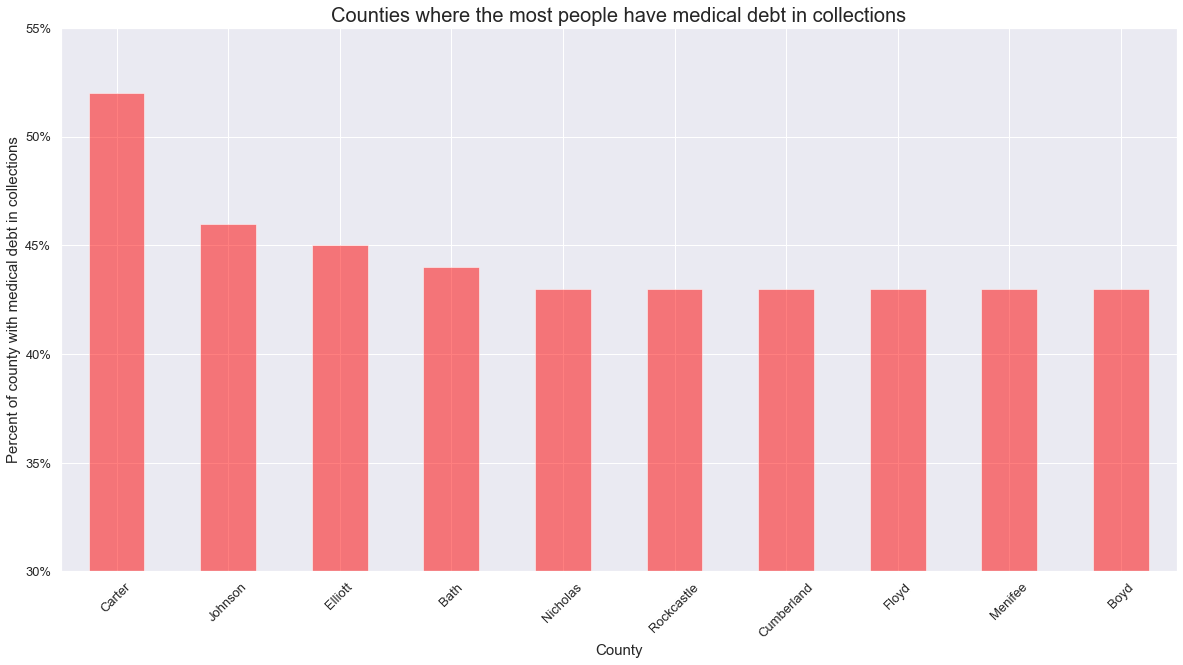

In [26]:
highest_pct_med_debt_coll.plot(kind='bar', x='County', y='pct_med_debt_in_coll', color='red', alpha=0.5, figsize=(20,10))
plt.xlabel('County', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.yticks([.30,.35,.40,.45,.50, .55],["30%","35%","40%","45%","50%", "55%"], fontsize=13)
plt.ylim(.3,.55)
plt.title('Counties where the most people have medical debt in collections', fontsize= 20)
plt.legend().remove()
plt.savefig('images/bar_highest_pct.jpg', dpi=300)
plt.show()



Which county had the lowest percent of medical debts in collections?

In [27]:
lowest_pct_med_debt_coll = ky_debt_pop_df.sort_values(by='pct_med_debt_in_coll', ascending=True).head(10)
lowest_pct_med_debt_coll.reset_index(drop=True)

County     State  pct_debt_in_coll  median_debt_in_coll  \
0    Carlisle  Kentucky              0.24               1295.0   
1    Marshall  Kentucky              0.22               1232.0   
2       Boone  Kentucky              0.28               1410.0   
3      Kenton  Kentucky              0.32               1238.0   
4    Campbell  Kentucky              0.32               1099.0   
5    Calloway  Kentucky              0.28                922.0   
6   Mccracken  Kentucky              0.37               1111.0   
7      Oldham  Kentucky              0.25               1390.0   
8     Hickman  Kentucky              0.28               1295.0   
9  Livingston  Kentucky              0.38               1342.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.13                    623.0              0.05   
1                  0.13                    480.0              0.03   
2                  0.13                    390.0              0.11   
3                  0.15                    495.0              0.11   
4                  0.15                    519.0              0.07   
5                  0.16                    680.0              0.10   
6                  0.18                    550.0              0.16   
7                  0.18                    634.0              0.11   
8                  0.18                    623.0              0.12   
9                  0.19                    623.0              0.04   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.14              0.12                 0.53       51628   
1                0.08              0.08                 0.18       56956   
2                0.06              0.04                 0.22       88538   
3                0.06              0.04                 0.15       70839   
4                0.07              0.06                 0.16       74290   
5                0.11              0.10                 0.20       50310   
6                0.05              0.05                 0.05       87060   
7                0.05              0.04                 0.15      106471   
8                0.14              0.14                 0.13       44888   
9                0.09              0.09                 0.11       55685   

   avg_income_white  avg_income_nonwhite  pop_2017  
0             51624                51765    4828.0  
1             57443                31082   31311.0  
2             87799                96049  130611.0  
3             72990                47309  165410.0  
4             75928                45680   92547.0  
5             52599                27634   38865.0  
6             88321                79664   65397.0  
7            106428               106964   66489.0  
8             46004                33568    4523.0  
9             55159                76568    9264.0

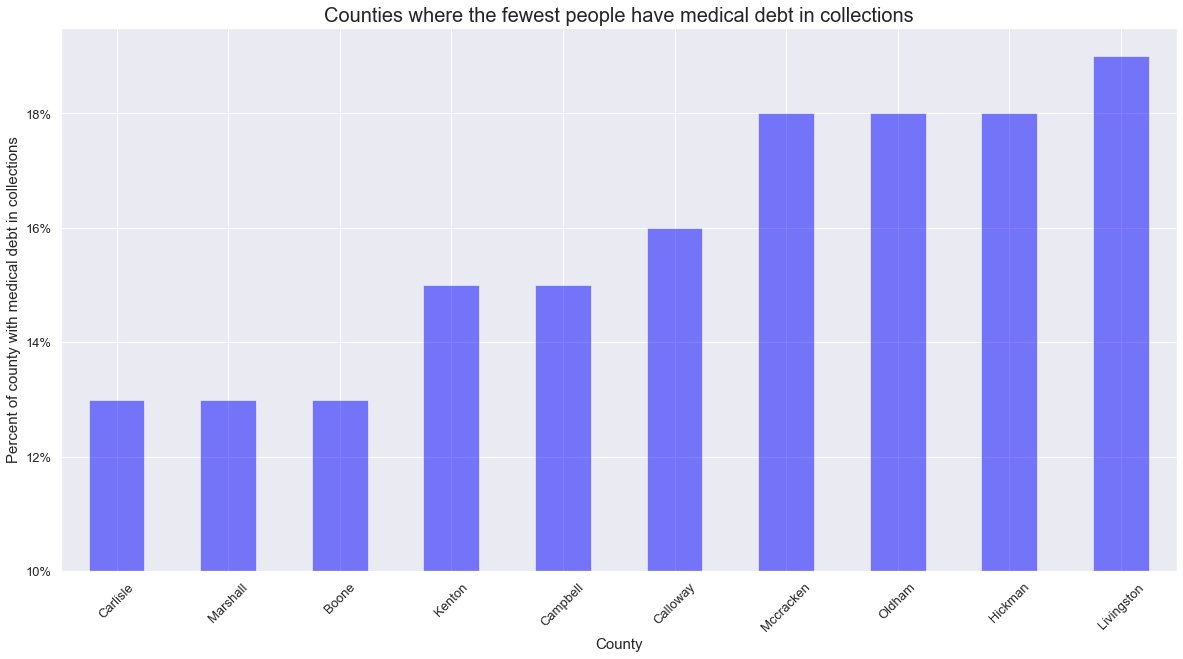

In [28]:
lowest_pct_med_debt_coll.plot(kind='bar', x='County', y='pct_med_debt_in_coll', color='blue', alpha=0.5, figsize=(20,10))
plt.xlabel('County', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.yticks([.10,.12,.14,.16,.18],["10%","12%","14%","16%","18%"], fontsize=13)
plt.ylim(.1,.195)
plt.title('Counties where the fewest people have medical debt in collections', fontsize= 20)
plt.legend().remove()
plt.savefig('images/bar_lowest_pct.jpg', dpi=300)
plt.show()



Which county had the highest median medical debt amount in collections?

In [29]:
highest_median_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.median_med_debt_in_coll != 'n/a*']
highest_median_med_debt_coll = highest_median_med_debt_coll.sort_values(by='median_med_debt_in_coll', ascending=False).head(10)
highest_median_med_debt_coll.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



County     State  pct_debt_in_coll  median_debt_in_coll  \
0       Union  Kentucky              0.37               2670.0   
1   Henderson  Kentucky              0.39               1845.0   
2     Simpson  Kentucky              0.43               1700.0   
3       Allen  Kentucky              0.41               2198.0   
4  Washington  Kentucky              0.39               1249.0   
5  Rockcastle  Kentucky              0.52               1564.0   
6    Harrison  Kentucky              0.36               2007.0   
7      Mercer  Kentucky              0.36               1594.0   
8      Powell  Kentucky              0.54               1449.0   
9   Christian  Kentucky              0.49               1542.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.27                   1644.0              0.17   
1                  0.28                   1316.0              0.13   
2                  0.33                   1249.0              0.15   
3                  0.35                   1200.0              0.04   
4                  0.30                    991.0              0.12   
5                  0.43                    963.0              0.02   
6                  0.28                    945.0              0.06   
7                  0.27                    923.0              0.08   
8                  0.34                    923.0              0.03   
9                  0.34                    912.0              0.33   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.14              0.10                 0.33       51971   
1                0.11              0.10                 0.17       54572   
2                0.13              0.11                 0.22       49851   
3                0.16              0.16                 0.28       52779   
4                0.11              0.09                 0.21       49984   
5                0.11              0.11                 0.11       42287   
6                0.15              0.14                 0.31       50510   
7                0.11              0.10                 0.19       54503   
8                0.13              0.13                 0.14       43275   
9                0.08              0.07                 0.09       45909   

   avg_income_white  avg_income_nonwhite  pop_2017  
0             54102                29859   14640.0  
1             56395                38329   45989.0  
2             52784                31009   18105.0  
3             51598                88920   20921.0  
4             51568                34939   11939.0  
5             42499                31704   16757.0  
6             51707                26113   18730.0  
7             55269                41636   21588.0  
8             43739                28999   12321.0  
9             48824                38634   71252.0

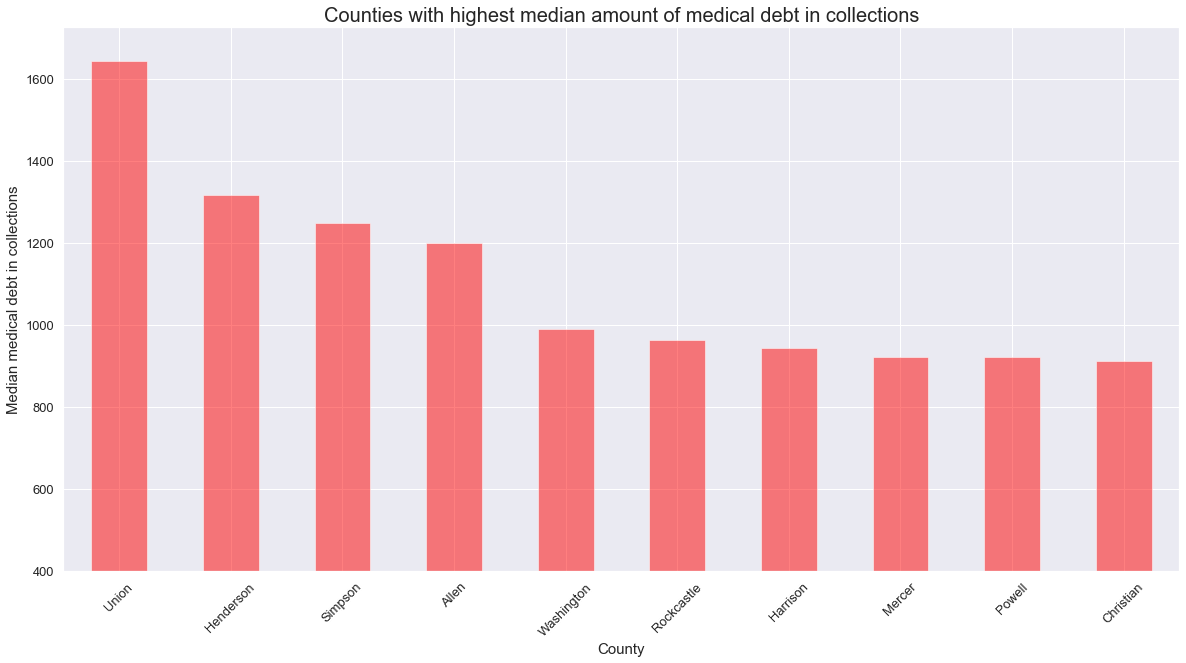

In [30]:
highest_median_med_debt_coll.plot(kind='bar', x='County', y='median_med_debt_in_coll', color='red', alpha=0.5, figsize=(20,10))
plt.xlabel('County', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel('Median medical debt in collections', fontsize=15)
plt.ylim(400,)
plt.yticks(fontsize=13)
plt.title('Counties with highest median amount of medical debt in collections', fontsize= 20)
plt.legend().remove()
plt.savefig('images/bar_highest_median.jpg', dpi=300)
plt.show()

Which county had the highest median medical debt amount in collections?

In [31]:
lowest_median_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.median_med_debt_in_coll != 'n/a*']
lowest_median_med_debt_coll = lowest_median_med_debt_coll.sort_values(by='median_med_debt_in_coll', ascending=True).head(10)
lowest_median_med_debt_coll.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



County     State  pct_debt_in_coll  median_debt_in_coll  \
0  Spencer  Kentucky              0.26                713.0   
1    Boyle  Kentucky              0.40               1208.0   
2   Monroe  Kentucky              0.50                857.0   
3  Hopkins  Kentucky              0.34               1135.0   
4   Morgan  Kentucky              0.47               1761.0   
5    Boone  Kentucky              0.28               1410.0   
6    Grant  Kentucky              0.40               1169.0   
7    Lewis  Kentucky              0.50               1312.0   
8     Clay  Kentucky              0.49               1055.0   
9     Pike  Kentucky              0.47               1337.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.19                    284.0              0.05   
1                  0.23                    321.0              0.14   
2                  0.37                    344.0              0.06   
3                  0.21                    363.0              0.11   
4                  0.34                    369.0              0.06   
5                  0.13                    390.0              0.11   
6                  0.24                    406.0              0.06   
7                  0.38                    427.0              0.02   
8                  0.31                    430.0              0.07   
9                  0.35                    433.0              0.03   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.07              0.06                 0.22       73839   
1                0.11              0.09                 0.18       56462   
2                0.11              0.09                 0.30       42684   
3                0.12              0.11                 0.21       54317   
4                0.11              0.11                 0.10       43026   
5                0.06              0.04                 0.22       88538   
6                0.11              0.11                 0.17       55470   
7                0.15              0.15                 0.09       41755   
8                0.11              0.11                 0.10       34745   
9                0.06              0.06                 0.22       50797   

   avg_income_white  avg_income_nonwhite  pop_2017  
0             74452                58976   18471.0  
1             57554                47549   29958.0  
2             43048                35863   10611.0  
3             55620                40128   45369.0  
4             43024                43087   13211.0  
5             87799                96049  130611.0  
6             55160                63713   25000.0  
7             41942                24929   13358.0  
8             34795                31669   20273.0  
9             46338               204448   58862.0

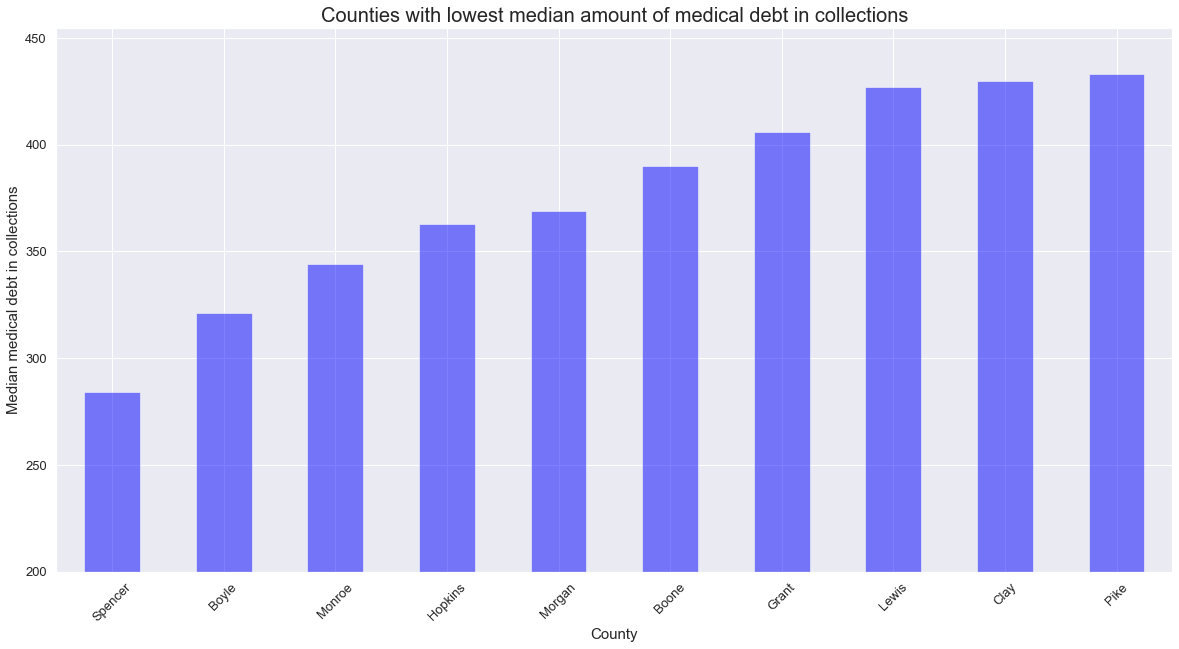

In [32]:
lowest_median_med_debt_coll.plot(kind='bar', x='County', y='median_med_debt_in_coll', color='blue', alpha=0.5, figsize=(20,10))
plt.xlabel('County', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel('Median medical debt in collections', fontsize=15)
plt.ylim(200,)
plt.yticks(fontsize=13)
plt.title('Counties with lowest median amount of medical debt in collections', fontsize= 20)
plt.legend().remove()
plt.savefig('images/bar_lowest_median.jpg', dpi=300)
plt.show()

In [33]:
ky_debt_pop_drop_median_na_df = ky_debt_pop_df[ky_debt_pop_df.median_med_debt_in_coll != 'n/a*']

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [34]:
ky_debt_pop_df.corr()

pct_debt_in_coll  median_debt_in_coll  \
pct_debt_in_coll                 1.000000             0.029368   
median_debt_in_coll              0.029368             1.000000   
pct_med_debt_in_coll             0.851569             0.142864   
median_med_debt_in_coll          0.067054             0.550724   
pct_pop_nonwhite                -0.221773             0.085427   
pct_overall_no_ins               0.410407             0.075616   
pct_white_no_ins                 0.427120             0.046906   
pct_nonwhite_no_ins             -0.002681            -0.005924   
avg_income                      -0.594502             0.034168   
avg_income_white                -0.589172             0.031139   
avg_income_nonwhite             -0.193039             0.023437   
pop_2017                        -0.123937             0.000754   

                         pct_med_debt_in_coll  median_med_debt_in_coll  \
pct_debt_in_coll                     0.851569                 0.067054   
median_debt_in_coll                  0.142864                 0.550724   
pct_med_debt_in_coll                 1.000000                 0.165587   
median_med_debt_in_coll              0.165587                 1.000000   
pct_pop_nonwhite                    -0.230522                 0.217339   
pct_overall_no_ins                   0.409490                 0.075282   
pct_white_no_ins                     0.425815                 0.006534   
pct_nonwhite_no_ins                  0.003669                 0.096891   
avg_income                          -0.476467                -0.031087   
avg_income_white                    -0.474064                -0.007349   
avg_income_nonwhite                 -0.172373                -0.121843   
pop_2017                            -0.134706                 0.036312   

                         pct_pop_nonwhite  pct_overall_no_ins  \
pct_debt_in_coll                -0.221773            0.410407   
median_debt_in_coll              0.085427            0.075616   
pct_med_debt_in_coll            -0.230522            0.409490   
median_med_debt_in_coll          0.217339            0.075282   
pct_pop_nonwhite                 1.000000           -0.306134   
pct_overall_no_ins              -0.306134            1.000000   
pct_white_no_ins                -0.404150            0.966078   
pct_nonwhite_no_ins             -0.069149            0.284592   
avg_income                       0.410420           -0.586242   
avg_income_white                 0.478296           -0.586031   
avg_income_nonwhite              0.035055           -0.348389   
pop_2017                         0.532424           -0.428999   

                         pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
pct_debt_in_coll                 0.427120            -0.002681   -0.594502   
median_debt_in_coll              0.046906            -0.005924    0.034168   
pct_med_debt_in_coll             0.425815             0.003669   -0.476467   
median_med_debt_in_coll          0.006534             0.096891   -0.031087   
pct_pop_nonwhite                -0.404150            -0.069149    0.410420   
pct_overall_no_ins               0.966078             0.284592   -0.586242   
pct_white_no_ins                 1.000000             0.128868   -0.633154   
pct_nonwhite_no_ins              0.128868             1.000000   -0.082644   
avg_income                      -0.633154            -0.082644    1.000000   
avg_income_white                -0.641367            -0.084072    0.994229   
avg_income_nonwhite             -0.324650            -0.017926    0.454330   
pop_2017                        -0.446232            -0.157560    0.375411   

                         avg_income_white  avg_income_nonwhite  pop_2017  
pct_debt_in_coll                -0.589172            -0.193039 -0.123937  
median_debt_in_coll              0.031139             0.023437  0.000754  
pct_med_debt_in_coll            -0.474064            -0.172373 -0.134706  
median_med_debt_in_coll         -0.007349 

In [35]:
shapefile = gpd.read_file('./data/County_Polygon_1z.shp')
shapefile.head()

OBJECTID_1  OBJECTID     NAME    NAME2            ADDNAME        SEAT  \
0           8       128  GREENUP  Greenup              FIVCO     Greenup   
1           9       129    MASON    Mason      BUFFALO TRACE   Maysville   
2          10       130  CARROLL  Carroll  NORTHERN KENTUCKY  Carrollton   
3          11       131    LEWIS    Lewis      BUFFALO TRACE   Vanceburg   
4          12       132  TRIMBLE  Trimble              KIPDA     Bedford   

        SEAT2  POP70  POP80  POP90  POP00  CH70_80  CH80_90  CH90_00  POP70SQ  \
0     GREENUP  33192  39132  36742  36891  17.8958  -6.1075   0.4055  93.6492   
1   MAYSVILLE  17273  17760  16666  16800   2.8194  -6.1599   0.8040  70.1020   
2  CARROLLTON   8523   9270   9292  10155   8.7645   0.2373   9.2875  62.0687   
3   VANCEBURG  12355  14545  13029  14092  17.7256 -10.4228   8.1587  24.9418   
4     BEDFORD   5349   6253   6090   8125  16.9003  -2.6067  33.4154  34.2418   

    POP80SQ   POP90SQ   POP00SQ  CHSQ70_80  CHSQ80_90  CHSQ90_00    MILES_SQ  \
0  110.4085  103.6653  104.0857    17.8958    -6.1075     0.4055  354.428925   
1   72.0785   67.6385   68.1824     2.8194    -6.1599     0.8041  246.397779   
2   67.5087   67.6690   73.9538     8.7644     0.2374     9.2875  137.315433   
3   29.3629   26.3024   28.4484    17.7256   -10.4230     8.1589  495.352760   
4   40.0288   38.9854   52.0125    16.9003    -2.6066    33.4153  156.212291   

   FIPS_NO FIPS_TXT  SMIS SP_ZONE                     REGION  \
0       89      089    45   NORTH           NORTHEAST REGION   
1      161      161    81   NORTH           NORTHEAST REGION   
2       41      041    21   NORTH   NORTHERN KENTUCKY REGION   
3      135      135    68   NORTH           NORTHEAST REGION   
4      223      223   112   NORTH  GREATER LOUISVILLE REGION   

                                 KYGEONET    SHAPE_area      SHAPE_len  \
0  7B6407538C-2334-4BC6-B445-E08B2E267686  9.880911e+09  519983.004395   
1  7B6407538C-2334-4BC6-B445-E08B2E267686  6.869176e+09  353399.657348   
2  7B6407538C-2334-4BC6-B445-E08B2E267686  3.828135e+09  329873.908860   
3  7B6407538C-2334-4BC6-B445-E08B2E267686  1.380964e+10  750422.834077   
4  7B6407538C-2334-4BC6-B445-E08B2E267686  4.354949e+09  296645.732761   

                                            geometry  
0  POLYGON ((5696927.000649408 4163203.493118197,...  
1  POLYGON ((5447610.998016492 4172645.258631453,...  
2  POLYGON ((5040176.500135705 4156066.247712791,...  
3  POLYGON ((5692349.492746815 4154522.004764766,...  
4  POLYGON ((5040176.500135705 4156066.247712791,...

In [36]:
shapefile_small = shapefile[['NAME2', 'geometry']]

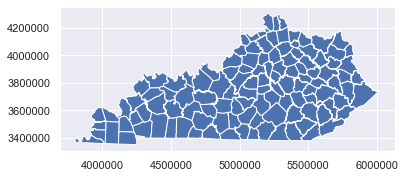

In [37]:
shapefile_small.plot()

In [38]:
shapefile_small = shapefile_small.rename(columns={'NAME2': 'County'})
shapefile_small.head()

County                                           geometry
0  Greenup  POLYGON ((5696927.000649408 4163203.493118197,...
1    Mason  POLYGON ((5447610.998016492 4172645.258631453,...
2  Carroll  POLYGON ((5040176.500135705 4156066.247712791,...
3    Lewis  POLYGON ((5692349.492746815 4154522.004764766,...
4  Trimble  POLYGON ((5040176.500135705 4156066.247712791,...

In [39]:
shapefile_small['County'] = shapefile_small['County'].str.capitalize()
shapefile_small.head()

County                                           geometry
0  Greenup  POLYGON ((5696927.000649408 4163203.493118197,...
1    Mason  POLYGON ((5447610.998016492 4172645.258631453,...
2  Carroll  POLYGON ((5040176.500135705 4156066.247712791,...
3    Lewis  POLYGON ((5692349.492746815 4154522.004764766,...
4  Trimble  POLYGON ((5040176.500135705 4156066.247712791,...

In [107]:
ky_debt_pop_shape_df = pd.merge(ky_debt_pop_df,shapefile_small, on=['County'], how ='inner')
ky_debt_pop_shape_df.head()

County     State  pct_debt_in_coll  median_debt_in_coll  \
0     Adair  Kentucky              0.41               1636.0   
1     Allen  Kentucky              0.41               2198.0   
2  Anderson  Kentucky              0.32               1119.0   
3   Ballard  Kentucky              0.32               1295.0   
4    Barren  Kentucky              0.41               1477.0   

   pct_med_debt_in_coll  median_med_debt_in_coll  pct_pop_nonwhite  \
0                  0.29                    767.0              0.06   
1                  0.35                   1200.0              0.04   
2                  0.24                    744.0              0.06   
3                  0.23                    623.0              0.07   
4                  0.29                    781.0              0.09   

   pct_overall_no_ins  pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
0                0.15              0.14                 0.27       45573   
1                0.16              0.16                 0.28       52779   
2                0.09              0.09                 0.06       61426   
3                0.12              0.12                 0.21       58182   
4                0.13              0.13                 0.15       49555   

   avg_income_white  avg_income_nonwhite  pop_2017  \
0             45942                38559   19294.0   
1             51598                88920   20921.0   
2             61528                58865   22518.0   
3             59729                30831    8021.0   
4             50043                43486   43815.0   

                                            geometry  
0  POLYGON ((5091332.504490286 3637133.24552922, ...  
1  POLYGON ((4807035.996361256 3493719.995950386,...  
2  POLYGON ((5130153.999390408 3935494.758557647,...  
3  POLYGON ((4025485.747941986 3521587.750047788,...  
4  POLYGON ((4922934.002443656 3585414.001578286,...

In [108]:
ky_bankruptcy_data = pd.read_excel('./data/ky_bankruptcy.xlsx', sheet_name="ky - bankruptcy -county")
ky_bankruptcy_data.head()

County  all chapters_non_business  non_business_chapter_7  \
0     ADAIR                         58                      48   
1     ALLEN                         73                      55   
2  ANDERSON                         98                      49   
3   BALLARD                         24                      14   
4    BARREN                        139                      98   

   non_business_chapter_13  
0                       10  
1                       18  
2                       49  
3                       10  
4                       41

In [42]:
ky_bankruptcy_data['County'] = ky_bankruptcy_data['County'].str.capitalize()
ky_bankruptcy_data.head()

County  all chapters_non_business  non_business_chapter_7  \
0     Adair                         58                      48   
1     Allen                         73                      55   
2  Anderson                         98                      49   
3   Ballard                         24                      14   
4    Barren                        139                      98   

   non_business_chapter_13  
0                       10  
1                       18  
2                       49  
3                       10  
4                       41

In [109]:
ky_debt_pop_shape_bankruptcy_df = pd.merge(ky_debt_pop_shape_df,ky_bankruptcy_data, on=['County'], how ='inner')
ky_debt_pop_shape_bankruptcy_df.head()

Empty DataFrame
Columns: [County, State, pct_debt_in_coll, median_debt_in_coll, pct_med_debt_in_coll, median_med_debt_in_coll, pct_pop_nonwhite, pct_overall_no_ins, pct_white_no_ins, pct_nonwhite_no_ins, avg_income, avg_income_white, avg_income_nonwhite, pop_2017, geometry, all chapters_non_business, non_business_chapter_7, non_business_chapter_13]
Index: []

In [44]:
ky_debt_pop_shape_bankruptcy_df.corr()

pct_debt_in_coll  median_debt_in_coll  \
pct_debt_in_coll                   1.000000             0.029368   
median_debt_in_coll                0.029368             1.000000   
pct_med_debt_in_coll               0.851569             0.142864   
median_med_debt_in_coll            0.067054             0.550724   
pct_pop_nonwhite                  -0.221773             0.085427   
pct_overall_no_ins                 0.410407             0.075616   
pct_white_no_ins                   0.427120             0.046906   
pct_nonwhite_no_ins               -0.002681            -0.005924   
avg_income                        -0.594502             0.034168   
avg_income_white                  -0.589172             0.031139   
avg_income_nonwhite               -0.193039             0.023437   
pop_2017                          -0.123937             0.000754   
all chapters_non_business         -0.097180            -0.002520   
non_business_chapter_7            -0.088091             0.003235   
non_business_chapter_13           -0.106313            -0.009406   

                           pct_med_debt_in_coll  median_med_debt_in_coll  \
pct_debt_in_coll                       0.851569                 0.067054   
median_debt_in_coll                    0.142864                 0.550724   
pct_med_debt_in_coll                   1.000000                 0.165587   
median_med_debt_in_coll                0.165587                 1.000000   
pct_pop_nonwhite                      -0.230522                 0.217339   
pct_overall_no_ins                     0.409490                 0.075282   
pct_white_no_ins                       0.425815                 0.006534   
pct_nonwhite_no_ins                    0.003669                 0.096891   
avg_income                            -0.476467                -0.031087   
avg_income_white                      -0.474064                -0.007349   
avg_income_nonwhite                   -0.172373                -0.121843   
pop_2017                              -0.134706                 0.036312   
all chapters_non_business             -0.120100                 0.030414   
non_business_chapter_7                -0.114233                 0.034567   
non_business_chapter_13               -0.124845                 0.024804   

                           pct_pop_nonwhite  pct_overall_no_ins  \
pct_debt_in_coll                  -0.221773            0.410407   
median_debt_in_coll                0.085427            0.075616   
pct_med_debt_in_coll              -0.230522            0.409490   
median_med_debt_in_coll            0.217339            0.075282   
pct_pop_nonwhite                   1.000000           -0.306134   
pct_overall_no_ins                -0.306134            1.000000   
pct_white_no_ins                  -0.404150            0.966078   
pct_nonwhite_no_ins               -0.069149            0.284592   
avg_income                         0.410420           -0.586242   
avg_income_white                   0.478296           -0.586031   
avg_income_nonwhite                0.035055           -0.348389   
pop_2017                           0.532424           -0.428999   
all chapters_non_business          0.486489           -0.396641   
non_business_chapter_7             0.490780           -0.412760   
non_business_chapter_13            0.471830           -0.369394   

                           pct_white_no_ins  pct_nonwhite_no_ins  avg_income  \
pct_debt_in_coll                   0.427120            -0.002681   -0.594502   
median_debt_in_coll                0.046906            -0.005924    0.034168   
pct_med_debt_in_coll               0.425815             0.003669   -0.476467   
median_med_debt_in_coll            0.006534             0.096891   -0.031087   
pct_pop_nonwhite                  -0.404150            -0.069149    0.410420   
pct_overall_no_ins                 0.966078             0.284592   -0.586242   
pct_white_no_ins                   1.000000             0.128868   -0.633154   
pct_nonw

## Overall data: Keeping the columns we need

In [45]:
ky_debt_pop_shape_bankruptcy_df_small =ky_debt_pop_shape_bankruptcy_df[['County','pct_debt_in_coll', 'median_debt_in_coll', 'pct_med_debt_in_coll',
                                 'median_med_debt_in_coll', 'pct_overall_no_ins', 'avg_income', 'pop_2017','all chapters_non_business', 'non_business_chapter_7', 'non_business_chapter_13'  ]]


ky_debt_pop_shape_bankruptcy_df_small.head()

County  pct_debt_in_coll  median_debt_in_coll  pct_med_debt_in_coll  \
0     Adair              0.41               1636.0                  0.29   
1     Allen              0.41               2198.0                  0.35   
2  Anderson              0.32               1119.0                  0.24   
3   Ballard              0.32               1295.0                  0.23   
4    Barren              0.41               1477.0                  0.29   

   median_med_debt_in_coll  pct_overall_no_ins  avg_income  pop_2017  \
0                    767.0                0.15       45573   19294.0   
1                   1200.0                0.16       52779   20921.0   
2                    744.0                0.09       61426   22518.0   
3                    623.0                0.12       58182    8021.0   
4                    781.0                0.13       49555   43815.0   

   all chapters_non_business  non_business_chapter_7  non_business_chapter_13  
0                         58                      48                       10  
1                         73                      55                       18  
2                         98                      49                       49  
3                         24                      14                       10  
4                        139                      98                       41

### overall data: add a column for the percent of county with insurance

In [46]:
ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'] = 1- (ky_debt_pop_shape_bankruptcy_df_small['pct_overall_no_ins'])
ky_debt_pop_shape_bankruptcy_df_small.head()

County  pct_debt_in_coll  median_debt_in_coll  pct_med_debt_in_coll  \
0     Adair              0.41               1636.0                  0.29   
1     Allen              0.41               2198.0                  0.35   
2  Anderson              0.32               1119.0                  0.24   
3   Ballard              0.32               1295.0                  0.23   
4    Barren              0.41               1477.0                  0.29   

   median_med_debt_in_coll  pct_overall_no_ins  avg_income  pop_2017  \
0                    767.0                0.15       45573   19294.0   
1                   1200.0                0.16       52779   20921.0   
2                    744.0                0.09       61426   22518.0   
3                    623.0                0.12       58182    8021.0   
4                    781.0                0.13       49555   43815.0   

   all chapters_non_business  non_business_chapter_7  non_business_chapter_13  \
0                         58                      48                       10   
1                         73                      55                       18   
2                         98                      49                       49   
3                         24                      14                       10   
4                        139                      98                       41   

   pct_overall_with_ins  
0                  0.85  
1                  0.84  
2                  0.91  
3                  0.88  
4                  0.87

### overall data:  add a column for the percent of bankruptcies in county

In [47]:
ky_debt_pop_shape_bankruptcy_df_small['pct_of_bankruptcies'] = ky_debt_pop_shape_bankruptcy_df_small['all chapters_non_business']/ky_debt_pop_shape_bankruptcy_df_small['pop_2017']
ky_debt_pop_shape_bankruptcy_df_small.head()

County  pct_debt_in_coll  median_debt_in_coll  pct_med_debt_in_coll  \
0     Adair              0.41               1636.0                  0.29   
1     Allen              0.41               2198.0                  0.35   
2  Anderson              0.32               1119.0                  0.24   
3   Ballard              0.32               1295.0                  0.23   
4    Barren              0.41               1477.0                  0.29   

   median_med_debt_in_coll  pct_overall_no_ins  avg_income  pop_2017  \
0                    767.0                0.15       45573   19294.0   
1                   1200.0                0.16       52779   20921.0   
2                    744.0                0.09       61426   22518.0   
3                    623.0                0.12       58182    8021.0   
4                    781.0                0.13       49555   43815.0   

   all chapters_non_business  non_business_chapter_7  non_business_chapter_13  \
0                         58                      48                       10   
1                         73                      55                       18   
2                         98                      49                       49   
3                         24                      14                       10   
4                        139                      98                       41   

   pct_overall_with_ins  pct_of_bankruptcies  
0                  0.85             0.003006  
1                  0.84             0.003489  
2                  0.91             0.004352  
3                  0.88             0.002992  
4                  0.87             0.003172

### overall data: a look at correlation matrix for moderate pos and neg correlations (.4 or -.4)

In [48]:
ky_debt_pop_shape_bankruptcy_df_small.corr()
ky_debt_pop_shape_bankruptcy_df_small_corr = ky_debt_pop_shape_bankruptcy_df_small.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
ky_debt_pop_shape_bankruptcy_df_small_corr.style.applymap(red)

### overall data: plotting 

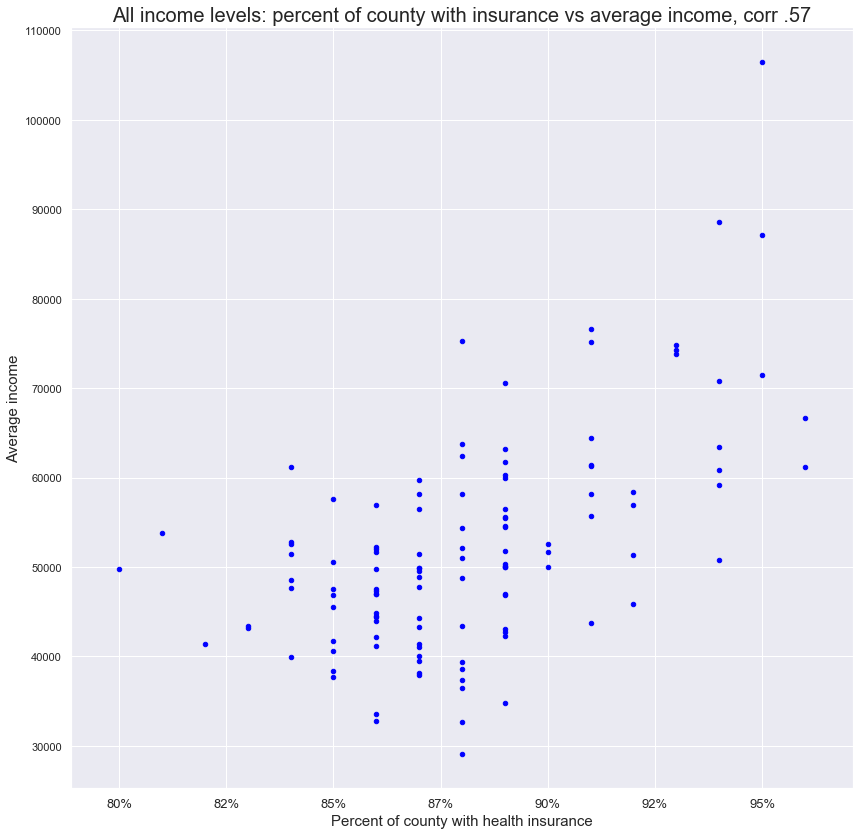

In [49]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], ky_debt_pop_shape_bankruptcy_df_small['avg_income'], color = "blue", s= 20)
plt.xlabel('Percent of county with health insurance', fontsize=15)
plt.ylabel('Average income', fontsize=15)
plt.xticks([.800,.825,.850,.875,.900, .925, .950],["80%","82%","85%","87%","90%","92%", "95%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: percent of county with insurance vs average income, corr .57', fontsize= 20)
plt.savefig('images/scatter_ins_income.jpg', dpi=300)

#### A strong correlation (.57) exists between avg income and the percent of the county with insurance. 

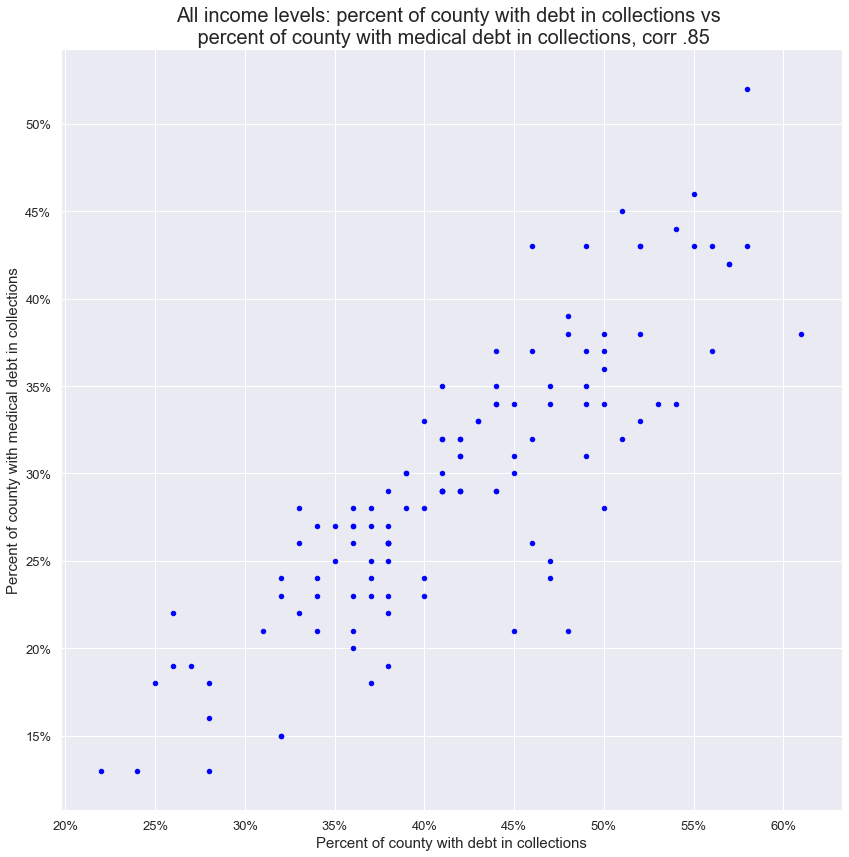

In [50]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_debt_in_coll'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "blue", s= 20)
plt.xlabel('Percent of county with debt in collections', fontsize=15)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.xticks([.20,.25,.30,.35,.40, .45, .50, .55, .60],["20%","25%","30%","35%","40%","45%", "50%", "55%", "60%"], fontsize=13)
plt.yticks([.15,.20,.25,.30,.35, .40, .45, .50],["15%","20%","25%","30%","35%","40%","45%", "50%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: percent of county with debt in collections vs \n percent of county with medical debt in collections, corr .85', fontsize= 20)
plt.savefig('images/scatter_debt_med_debt.jpg', dpi=300)

#### So, a significant amount of people who have debt in collections have medical debt in collections.

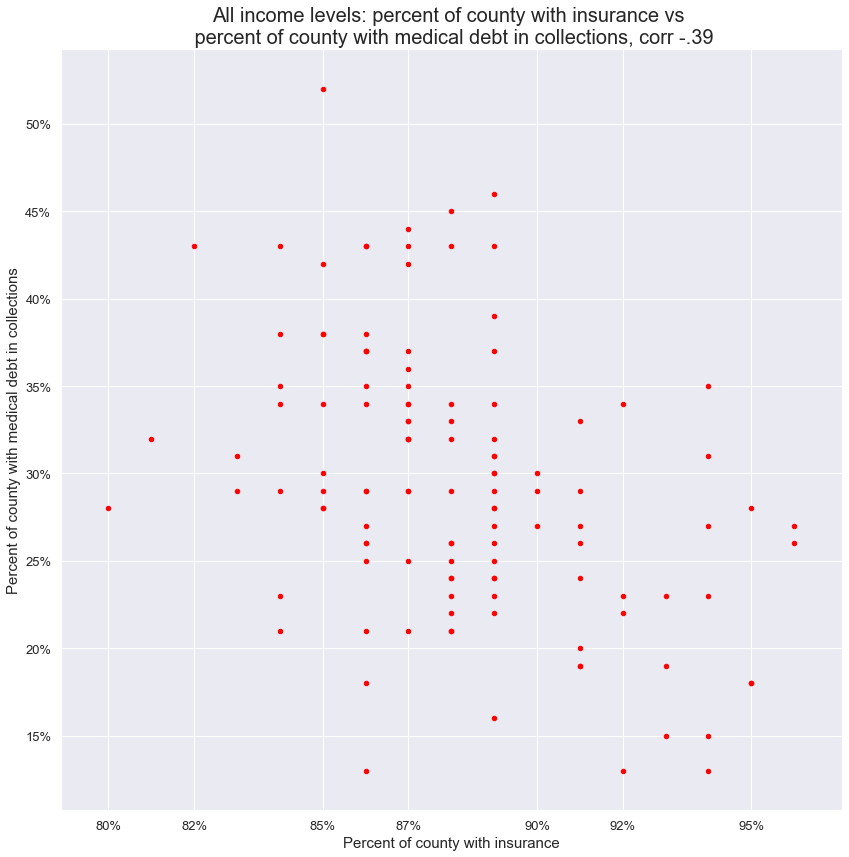

In [51]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "red", s= 20)
plt.xlabel('Percent of county with insurance', fontsize=15)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.xticks([.80,.82,.85,.87,.90, .92, .95],["80%","82%","85%","87%","90%","92%", "95%"], fontsize=13)
plt.yticks([.15,.20,.25,.30,.35, .40, .45, .50],["15%","20%","25%","30%","35%","40%","45%", "50%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: percent of county with insurance vs \n percent of county with medical debt in collections, corr -.39', fontsize= 20)
plt.savefig('images/scatter_med_debt_ins.jpg', dpi=300)

#### The above negative correlation between percent of med debt in collections and the percent of county with insurance is -.39. I would expect this number to be higher, i.e. a stronger relationship of the following: as the percent of medical debt in collections decreases, the percent of people with insurance increases. I.e. insurance is a protective factor from unmanageable medical debt. 

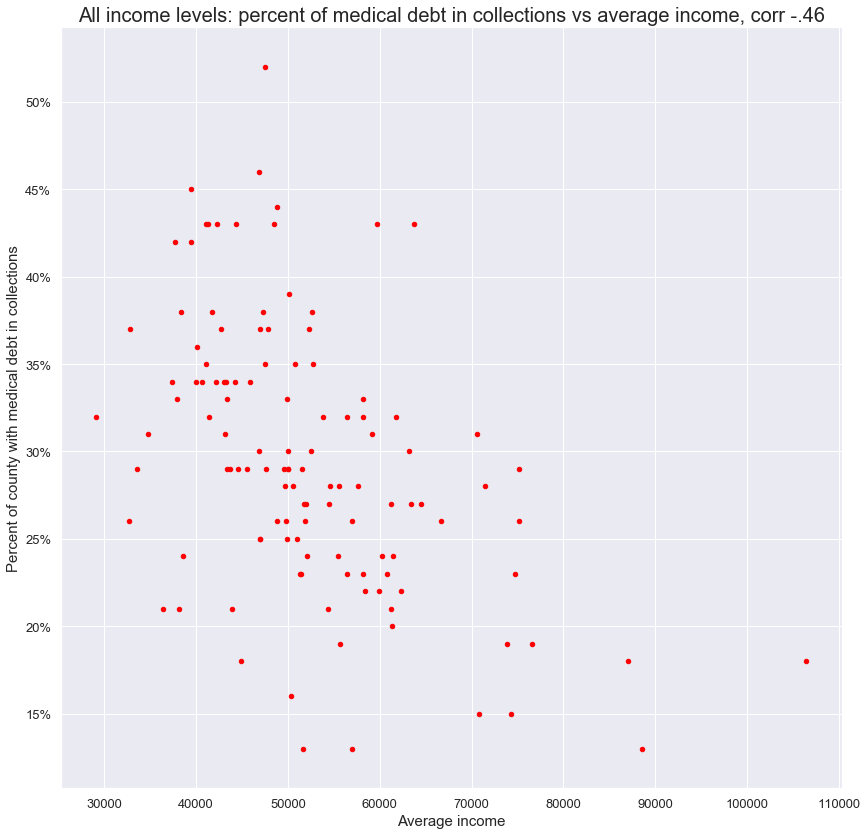

In [52]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['avg_income'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "red", s= 20)
plt.xlabel('Average income', fontsize=15)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.yticks([.15,.20,.25,.30,.35, .40, .45, .50],["15%","20%","25%","30%","35%","40%","45%", "50%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: percent of medical debt in collections vs average income, corr -.46', fontsize= 20)
plt.savefig('images/scatter_med_debt_income.jpg', dpi=300)

#### The above indicates a negative correlation between percent of county with medical debt in collection and average income. I.e. the higher a county's income, the less number of people in that county have medical debt in collections. Makes sense.

Text(0.5, 1.0, 'All income levels Population 2017 vs pct_of county with no insurance -.43')

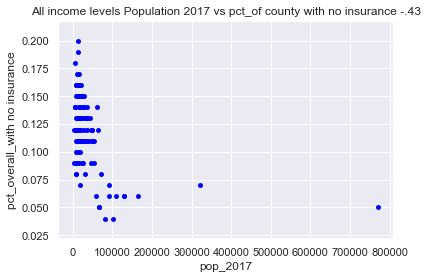

In [53]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pop_2017'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_no_ins'], color = "blue", s= 15)
plt.xlabel('pop_2017')
plt.ylabel('pct_overall_with no insurance')
plt.title('All income levels Population 2017 vs pct_of county with no insurance -.43')

#### now without outiers

(0, 200000)

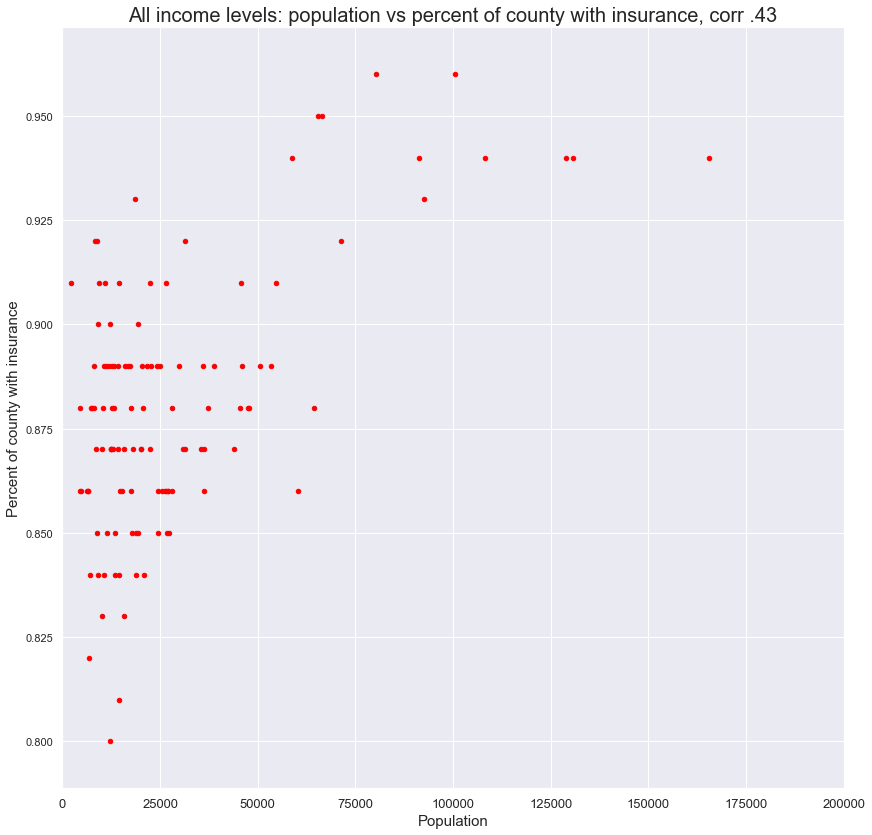

In [54]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pop_2017'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], color = "red", s= 20)
plt.xlabel('Population', fontsize=15)
plt.ylabel('Percent of county with insurance', fontsize=15)
#plt.yticks([.15,.20,.25,.30,.35, .40, .45, .50],["15%","20%","25%","30%","35%","40%","45%", "50%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: population vs percent of county with insurance, corr .43', fontsize= 20)
plt.xlim(0,200000)

(0, 200000)

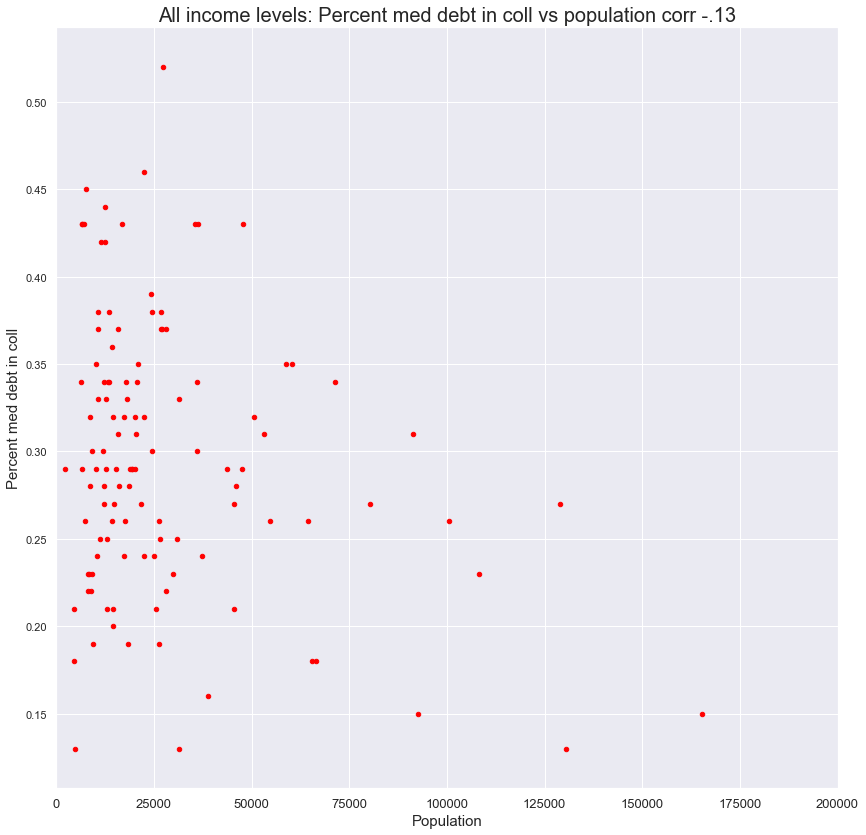

In [55]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pop_2017'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "red", s= 20)
plt.xlabel('Population', fontsize=15)
plt.ylabel('Percent med debt in coll', fontsize=15)
#plt.yticks([.15,.20,.25,.30,.35, .40, .45, .50],["15%","20%","25%","30%","35%","40%","45%", "50%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: Percent med debt in coll vs population corr -.13', fontsize= 20)
plt.xlim(0,200000)

#### So there is a moderate negative correlation between the percent of county without insurance and the population, i.e. in more sparsely populated counties you will find more people without insurance. 

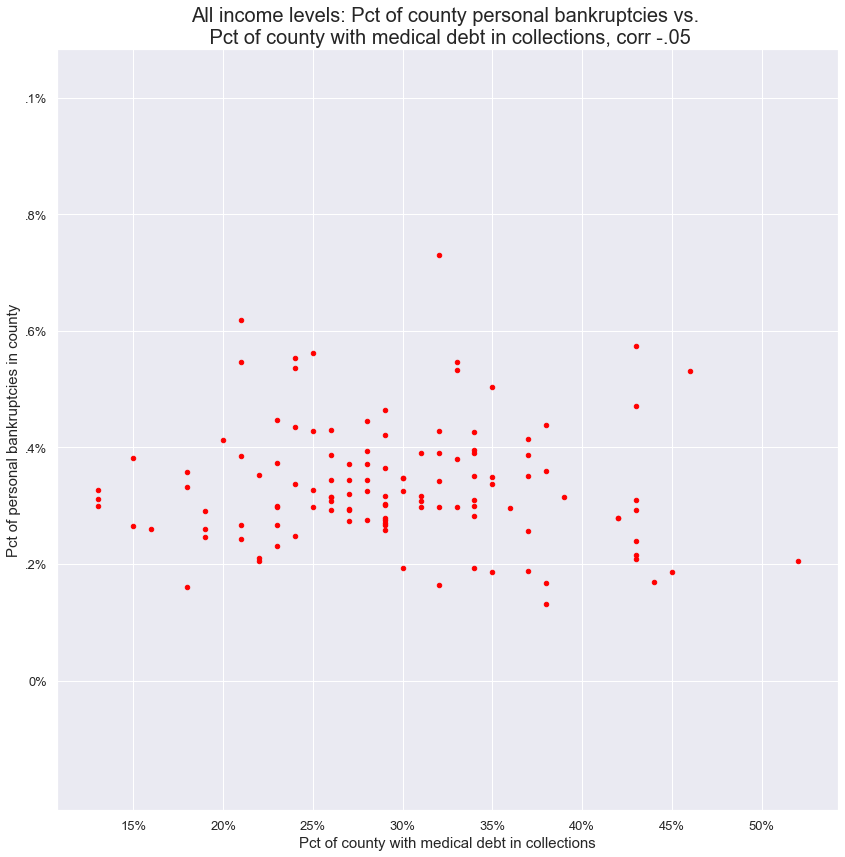

In [56]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], ky_debt_pop_shape_bankruptcy_df_small['pct_of_bankruptcies'], color = "red", s= 20)
plt.xlabel('Pct of county with medical debt in collections', fontsize=15)
plt.ylabel('Pct of personal bankruptcies in county', fontsize=15)
plt.yticks([0.000,0.002,0.004,0.006, 0.008,0.010],["0%",".2%",".4%",".6%",".8%",".1%"], fontsize=13)
plt.xticks([0.15,0.20,0.25,0.30, 0.35,0.40, 0.45, 0.50],["15%","20%","25%","30%","35%","40%", "45%", "50%"],fontsize=13)
plt.title('All income levels: Pct of county personal bankruptcies vs. \n Pct of county with medical debt in collections, corr -.05', fontsize= 20)
plt.savefig('images/scatter_med_debt_bankrupt.jpg', dpi=300)

#### Looking at all income levels, there is no correlation between the percent of the county with medical debt in collections and percent of bankruptcies in a county. 

Text(0.5, 1.0, 'bankruptcies all chapters_non_business vs pct_overall_with_ins .40')

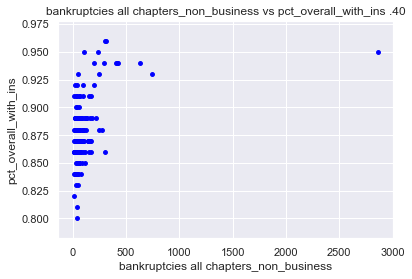

In [57]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['all chapters_non_business'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], color = "blue", s= 15)
plt.xlabel('bankruptcies all chapters_non_business')
plt.ylabel('pct_overall_with_ins')
plt.title('bankruptcies all chapters_non_business vs pct_overall_with_ins .40')

#### now without outiers

(0, 750)

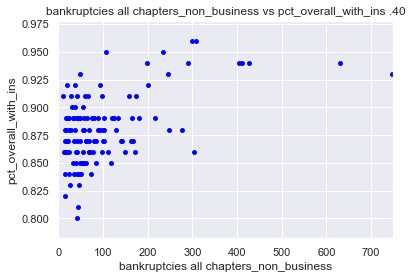

In [58]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['all chapters_non_business'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], color = "blue", s= 15)
plt.xlabel('bankruptcies all chapters_non_business')
plt.ylabel('pct_overall_with_ins')
plt.title('bankruptcies all chapters_non_business vs pct_overall_with_ins .40')
plt.xlim(0,750)

#### not sure how much I can conclude from the above. There is a moderate correlation between the number of bankruptcies in a county and percentage of people with insurance. This could mean that people with insurance have the money to file for bankruptcy?

### Looking at correlations within low, middle and high income levels

#### First find the income percentiles 

In [59]:
ky_debt_pop_shape_bankruptcy_df_small.describe()

pct_debt_in_coll  median_debt_in_coll  pct_med_debt_in_coll  \
count        119.000000           120.000000             120.00000   
mean           0.418151          1340.375000               0.29500   
std            0.082277           350.592585               0.07828   
min            0.220000           713.000000               0.13000   
25%            0.365000          1138.750000               0.24000   
50%            0.410000          1295.000000               0.29000   
75%            0.480000          1462.000000               0.34000   
max            0.610000          2905.000000               0.52000   

       median_med_debt_in_coll  pct_overall_no_ins     avg_income  \
count               120.000000          120.000000     120.000000   
mean                655.016667            0.118500   52205.508333   
std                 197.991256            0.031878   12223.566846   
min                 284.000000            0.040000   29120.000000   
25%                 548.750000            0.110000   43633.000000   
50%                 623.000000            0.120000   50190.500000   
75%                 744.250000            0.140000   58200.250000   
max                1644.000000            0.200000  106471.000000   

            pop_2017  all chapters_non_business  non_business_chapter_7  \
count     120.000000                 120.000000              120.000000   
mean    37115.616667                 125.500000               81.591667   
std     77775.606185                 277.411353              153.258528   
min      2132.000000                   9.000000                4.000000   
25%     12236.000000                  37.750000               25.500000   
50%     19028.000000                  61.000000               45.000000   
75%     35603.250000                 121.250000               88.750000   
max    770377.000000                2864.000000             1519.000000   

       non_business_chapter_13  pct_overall_with_ins  pct_of_bankruptcies  
count               120.000000            120.000000           120.000000  
mean                 43.891667              0.881500             0.003354  
std                 126.525368              0.031878             0.001040  
min                   1.000000              0.800000             0.001305  
25%                  10.000000              0.860000             0.002746  
50%                  19.000000              0.880000             0.003163  
75%                  37.250000              0.890000             0.003868  
max                1344.000000              0.960000             0.007300

#### create dataframe for low income: below 25% (43717)

In [60]:
bottom_income_ky_debt_pop_shape_bankruptcy_df = ky_debt_pop_shape_bankruptcy_df_small.loc[ky_debt_pop_shape_bankruptcy_df_small.avg_income < 43717] # avg income less than 25%
bottom_income_ky_debt_pop_shape_bankruptcy_df.reset_index(drop=True)

County  pct_debt_in_coll  median_debt_in_coll  pct_med_debt_in_coll  \
0         Bell              0.56               1030.0                  0.37   
1    Breathitt              0.45                916.0                  0.21   
2       Butler              0.43               1249.0                  0.33   
3        Casey              0.45                787.0                  0.31   
4         Clay              0.49               1055.0                  0.31   
5      Clinton              0.44               1031.0                  0.35   
6   Cumberland              0.46               1087.0                  0.43   
7      Elliott              0.51               1295.0                  0.45   
8       Estill              0.50               1108.0                  0.36   
9       Fulton              0.53                998.0                  0.34   
10      Harlan              0.52               1271.0                  0.38   
11     Jackson              0.44               1359.0                  0.34   
12        Knox              0.52               1063.0                  0.33   
13         Lee              0.44               1295.0                  0.29   
14      Leslie              0.47                826.0                  0.24   
15     Letcher              0.46               1395.0                  0.32   
16       Lewis              0.50               1312.0                  0.38   
17    Mccreary              0.51               1346.0                  0.32   
18    Magoffin              0.57               1079.0                  0.42   
19      Martin              0.57               2454.0                  0.42   
20     Menifee              0.55               1488.0                  0.43   
21    Metcalfe              0.41               1241.0                  0.29   
22      Monroe              0.50                857.0                  0.37   
23      Morgan              0.47               1761.0                  0.34   
24      Owsley              0.48               1295.0                  0.21   
25      Powell              0.54               1449.0                  0.34   
26  Rockcastle              0.52               1564.0                  0.43   
27     Russell              0.44               1199.0                  0.34   
28       Wayne              0.45               1181.0                  0.34   
29       Wolfe              0.46               1497.0                  0.26   

    median_med_debt_in_coll  pct_overall_no_ins  avg_income  pop_2017  \
0                     545.0                0.14       32781   26904.0   
1                     623.0                0.13       38128   12931.0   
2                     784.0                0.12       43381   12798.0   
3                     438.0                0.17       43192   15794.0   
4                     430.0                0.11       34745   20273.0   
5                     661.0                0.13       41050   10239.0   
6                     580.0                0.18       41349    6696.0   
7                     623.0                0.12       39390    7508.0   
8                     591.0                0.13       40072   14227.0   
9                     623.0                0.14       42169    6204.0   
10                    832.0                0.15       38365   26725.0   
11                    578.0                0.16       39956   13420.0   
12                    457.0                0.13       37892   31484.0   
13                    623.0                0.14       33515    6590.0   
14                    623.0                0.12       38612   10309.0   
15                    506.0                0.13       41430   22328.0   
16                    427.0                0.15       41755   13358.0   
17                    850.0                0.12       29120   17423.0   
18                    692.0                0.13       39483   12539.0   
19                    739.0                0.15       37649   11495.0   
20                    623

#### find correlation for bottom income group

In [61]:
bottom_income_ky_debt_pop_shape_bankruptcy_df.corr()

bottom_income_ky_debt_pop_shape_bankruptcy_df_corr = bottom_income_ky_debt_pop_shape_bankruptcy_df.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
bottom_income_ky_debt_pop_shape_bankruptcy_df_corr.style.applymap(red)

Text(0.5, 1.0, 'Lower income level less than 43717: income level pct_debt_in_coll vs pct_med_debt_in_coll corr .54')

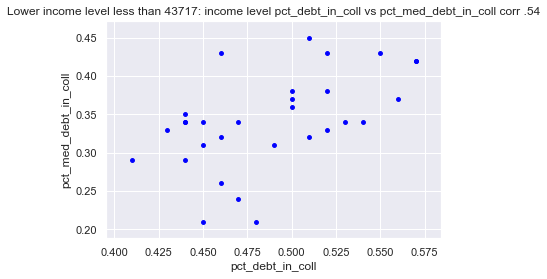

In [62]:
plt.scatter(bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_debt_in_coll'], bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Lower income level less than 43717: income level pct_debt_in_coll vs pct_med_debt_in_coll corr .54')

#### Relative to all income levells, with lower income segment, there is a weaker correlation between percent of the county with debt in collections and percent with medical debt in collections. 

Text(0.5, 1.0, 'Low income level pct_overall_with_ins vs pct_med_debt_in_coll corr -.15')

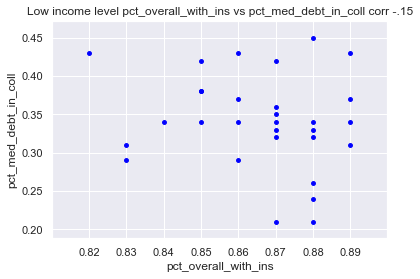

In [63]:
plt.scatter(bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Low income level pct_overall_with_ins vs pct_med_debt_in_coll corr -.15')

#### According to the above, for lower income segment, there is no correlation between the percent of the county with insurance and the percent of the county with medical debt in collections. This is different from overall where you see  a -.39

(0, 0.01)

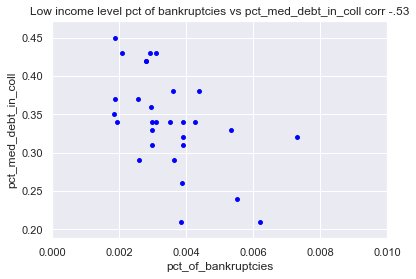

In [64]:
plt.scatter(bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_of_bankruptcies')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Low income level pct of bankruptcies vs pct_med_debt_in_coll corr -.53')
plt.xlim(0,.01)

#### According to the above, for lower income segment, there is a moderate negative correlation between the percentage of bankruptcies in a county and the percent of the coutny with medical debt in collections. Possibly because lower income levels are less likely to have the money to file for bankruptcy. This is different from all income levels where there was no correlation between the percent of the county with medical debt in collections and percent of bankruptcies in a county.

### A look at middle incomes

In [65]:
middle_income_ky_debt_pop_shape_bankruptcy_df = ky_debt_pop_shape_bankruptcy_df_small[(ky_debt_pop_shape_bankruptcy_df_small.avg_income >= 43717) & (ky_debt_pop_shape_bankruptcy_df_small.avg_income < 58199)] # avg income between 25% and 75%
middle_income_ky_debt_pop_shape_bankruptcy_df.reset_index(drop=True)


County  pct_debt_in_coll  median_debt_in_coll  pct_med_debt_in_coll  \
0          Adair              0.41               1636.0                  0.29   
1          Allen              0.41               2198.0                  0.35   
2        Ballard              0.32               1295.0                  0.23   
3         Barren              0.41               1477.0                  0.29   
4           Bath              0.54               1012.0                  0.44   
5          Boyle              0.40               1208.0                  0.23   
6        Bracken              0.34               1727.0                  0.23   
7   Breckinridge              0.42               1333.0                  0.29   
8       Caldwell              0.41               1677.0                  0.29   
9       Calloway              0.28                922.0                  0.16   
10      Carlisle              0.24               1295.0                  0.13   
11       Carroll              0.61               1215.0                  0.38   
12        Carter              0.58               1422.0                  0.52   
13     Christian              0.49               1542.0                  0.34   
14    Crittenden              0.36                798.0                  0.23   
15      Edmonson              0.35               1342.0                  0.27   
16       Fleming              0.41               2168.0                  0.32   
17         Floyd              0.56               1138.0                  0.43   
18      Gallatin              0.50               1291.0                  0.28   
19       Garrard              0.38                845.0                  0.26   
20         Grant              0.40               1169.0                  0.24   
21        Graves              0.34               1699.0                  0.24   
22       Grayson              0.38               1199.0                  0.26   
23         Green              0.37                833.0                  0.25   
24      Harrison              0.36               2007.0                  0.28   
25          Hart              0.42               1315.0                  0.29   
26     Henderson              0.39               1845.0                  0.28   
27         Henry              0.37               1644.0                  0.28   
28       Hickman              0.28               1295.0                  0.18   
29       Hopkins              0.34               1135.0                  0.21   
30       Johnson              0.55               1184.0                  0.46   
31         Knott              0.44               1202.0                  0.29   
32         Larue              0.38                831.0                  0.26   
33        Laurel              0.49               1291.0                  0.35   
34      Lawrence              0.49               1341.0                  0.37   
35       Lincoln              0.45               1211.0                  0.30   
36    Livingston              0.38               1342.0                  0.19   
37         Logan              0.44               1236.0                  0.37   
38        Mclean              0.39               1418.0                  0.30   
39        Marion              0.42               1991.0                  0.29   
40      Marshall              0.22               1232.0                  0.13   
41        Mercer              0.36               1594.0                  0.27   
42    Montgomery              0.46               1354.0                  0.37   
43    Muhlenberg              0.38               1431.0                  0.25   
44      Nicholas              0.58               1691.0                  0.43   
45          Ohio              0.48               1022.0                  0.39   
46         Perry              0.47                989.0                  0.25   
47          Pike              0.47               1337.0                  0.35   
48       Pulaski              0.38       

In [66]:
middle_income_ky_debt_pop_shape_bankruptcy_df.corr()
middle_income_ky_debt_pop_shape_bankruptcy_df_corr = middle_income_ky_debt_pop_shape_bankruptcy_df.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
middle_income_ky_debt_pop_shape_bankruptcy_df_corr.style.applymap(red)

Text(0.5, 1.0, 'Mid income level pct of people with debt in collections vs pct of people with medical debt in collections .89')

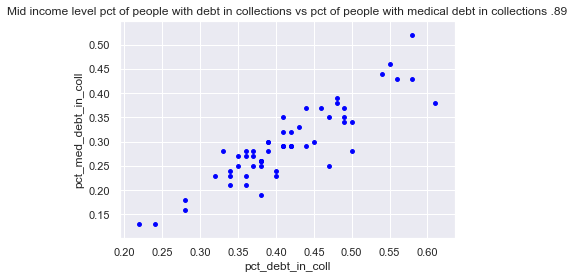

In [67]:
plt.scatter(middle_income_ky_debt_pop_shape_bankruptcy_df['pct_debt_in_coll'], middle_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Mid income level pct of people with debt in collections vs pct of people with medical debt in collections .89')

#### Within the middle income group, there is a stronger correlation compared to the low income group, between percent of people with debt in collections and the percent of people with medical debt in collections. 

Text(0.5, 1.0, 'Mid income level pct of people with insurance vs pct of people with medical debt in collections -.22')

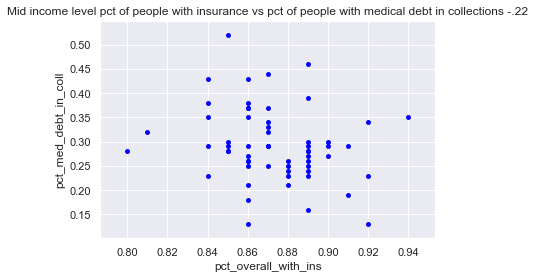

In [68]:
plt.scatter(middle_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], middle_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Mid income level pct of people with insurance vs pct of people with medical debt in collections -.22')

#### Similar to the low income group (-.39 corr), there is no correlation between the percent of people with insurance and the percent of people with medical debt in collections (-.22).

Text(0.5, 1.0, 'Mid income level pct of bankruptcies vs pct of people with medical debt in collections -.03')

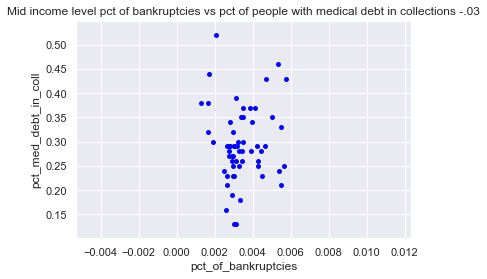

In [69]:
plt.scatter(middle_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], middle_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_of_bankruptcies')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Mid income level pct of bankruptcies vs pct of people with medical debt in collections -.03')

#### This is interesting. Why at lower income level, the percent of bankruptcies and the percent of medical debt in collections, there a negative orrelation (-.53) but at the middle income levels, there is no correlation (-.03). Why?

### A look at top incomes

In [70]:
top_income_ky_debt_pop_shape_bankruptcy_df = ky_debt_pop_shape_bankruptcy_df_small.loc[ky_debt_pop_shape_bankruptcy_df_small.avg_income > 58199] # avg income above 75%
top_income_ky_debt_pop_shape_bankruptcy_df.reset_index(drop=True)


County  pct_debt_in_coll  median_debt_in_coll  pct_med_debt_in_coll  \
0    Anderson              0.32               1119.0                  0.24   
1       Boone              0.28               1410.0                  0.13   
2        Boyd              0.52               1708.0                  0.43   
3     Bullitt              0.36               1320.0                  0.27   
4    Campbell              0.32               1099.0                  0.15   
5       Clark              0.41               1363.0                  0.30   
6     Daviess              0.33               1444.0                  0.26   
7     Fayette              0.37               1182.0                  0.23   
8    Franklin              0.42               1605.0                  0.32   
9     Greenup              0.49               1681.0                  0.43   
10    Hancock              0.26               1295.0                  0.22   
11     Hardin              0.38               1295.0                  0.23   
12  Jefferson              0.40               1367.0                  0.28   
13  Jessamine              0.42               1532.0                  0.31   
14     Kenton              0.32               1238.0                  0.15   
15       Lyon              0.33               1295.0                  0.22   
16  Mccracken              0.37               1111.0                  0.18   
17    Madison              0.42               1378.0                  0.31   
18      Mason              0.37               1359.0                  0.24   
19      Meade              0.38               1277.0                  0.22   
20     Nelson              0.34               1114.0                  0.27   
21     Oldham              0.25               1390.0                  0.18   
22       Owen              0.40               1189.0                  0.33   
23  Pendleton              0.36               1033.0                  0.20   
24      Scott              0.36               1493.0                  0.26   
25     Shelby              0.38                941.0                  0.29   
26    Spencer              0.26                713.0                  0.19   
27      Trigg              0.31               1518.0                  0.21   
28     Warren              0.38               1658.0                  0.27   
29   Woodford              0.27               1139.0                  0.19   

    median_med_debt_in_coll  pct_overall_no_ins  avg_income  pop_2017  \
0                     744.0                0.09       61426   22518.0   
1                     390.0                0.06       88538  130611.0   
2                     790.0                0.12       63743   47759.0   
3                     674.0                0.04       61222   80284.0   
4                     519.0                0.07       74290   92547.0   
5                     656.0                0.11       63223   35940.0   
6                     593.0                0.04       66638  100546.0   
7                     655.0                0.07       74766  322193.0   
8                     741.0                0.11       61784   50504.0   
9                     875.0                0.13       59689   35491.0   
10                    623.0                0.08       58391    8778.0   
11                    563.0                0.06       60809  108226.0   
12                    786.0                0.05       71497  770377.0   
13                    752.0                0.11       70610   53281.0   
14                    495.0                0.06       70839  165410.0   
15                    623.0                0.11       59889    8113.0   
16                    550.0                0.05       87060   65397.0   
17                    659.0                0.06       59116   91226.0   
18                    752.0                0.11       60229   17225.0   
19                    633.0                0.12       62364   28094.0   
20                    678.0                0.09       6

In [71]:
top_income_ky_debt_pop_shape_bankruptcy_df.corr()
top_income_ky_debt_pop_shape_bankruptcy_df_corr = top_income_ky_debt_pop_shape_bankruptcy_df.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
top_income_ky_debt_pop_shape_bankruptcy_df_corr.style.applymap(red)

Text(0.5, 1.0, 'Top income level pct of county with debt in collections vs pct of county with medical debt in collections .87')

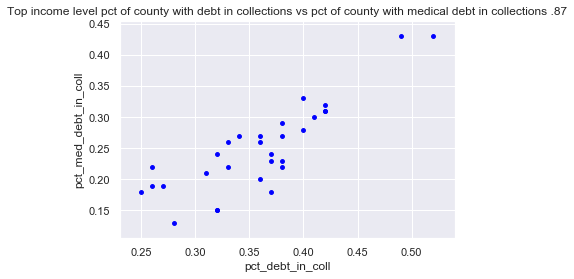

In [72]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_debt_in_coll'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Top income level pct of county with debt in collections vs pct of county with medical debt in collections .87')

#### Within the top income group, there is a strong correlation between percent of people with debt in collections and the percent of people with medical debt in collections (.87). This strong correlation is consistent across income groups. 

Text(0.5, 1.0, 'Top income level pct of county with insurance vs pct of county with medical debt in collections -.36')

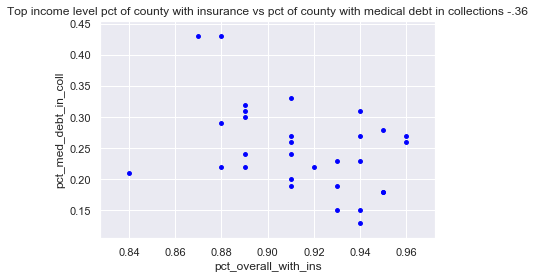

In [73]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Top income level pct of county with insurance vs pct of county with medical debt in collections -.36')

#### The low income group (-.15 corr) has no/low correlation compared to the middle income group (-.39 corr), and the high income group (-.36).

Text(0.5, 1.0, 'Top income level pct of county with insurance vs pct of personal bankruptcies in county .14')

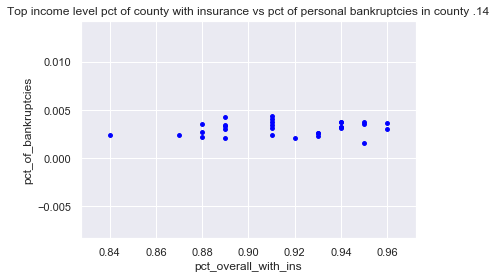

In [74]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_of_bankruptcies')
plt.title('Top income level pct of county with insurance vs pct of personal bankruptcies in county .14')


#### At top income level there is no correlation between the percent ofthe county with insurance and the percent of bankruptcies in the county. 

Text(0.5, 1.0, 'Top income level pct of bankruptcies in coutny vs pct of medical debt in collections .01')

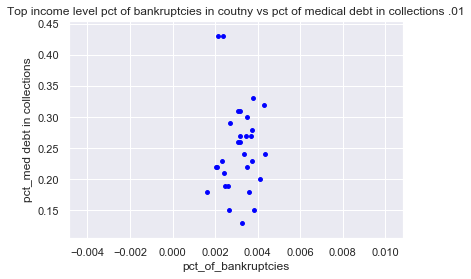

In [75]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_of_bankruptcies')
plt.ylabel('pct_med debt in collections')
plt.title('Top income level pct of bankruptcies in coutny vs pct of medical debt in collections .01')

#### At top income level there is no correlation between the percent of bankruptcies and the percent ofmedical debt in collections in the county.





#### Looking again at the overall df, adding a column for the income groups

In [76]:
    # Create a function to assign income groups
    income_group = []
    for row in ky_debt_pop_shape_bankruptcy_df_small['avg_income']:
        if row < 43717:    income_group.append('low_income')
        elif row >= 43717 and row < 58199:  income_group.append('middle_income')
        else:           income_group.append('high_income')
    # Create a column from the list
    ky_debt_pop_shape_bankruptcy_df_small['income_group'] = income_group
    
ky_debt_pop_shape_bankruptcy_df_small.head()

County  pct_debt_in_coll  median_debt_in_coll  pct_med_debt_in_coll  \
0     Adair              0.41               1636.0                  0.29   
1     Allen              0.41               2198.0                  0.35   
2  Anderson              0.32               1119.0                  0.24   
3   Ballard              0.32               1295.0                  0.23   
4    Barren              0.41               1477.0                  0.29   

   median_med_debt_in_coll  pct_overall_no_ins  avg_income  pop_2017  \
0                    767.0                0.15       45573   19294.0   
1                   1200.0                0.16       52779   20921.0   
2                    744.0                0.09       61426   22518.0   
3                    623.0                0.12       58182    8021.0   
4                    781.0                0.13       49555   43815.0   

   all chapters_non_business  non_business_chapter_7  non_business_chapter_13  \
0                         58                      48                       10   
1                         73                      55                       18   
2                         98                      49                       49   
3                         24                      14                       10   
4                        139                      98                       41   

   pct_overall_with_ins  pct_of_bankruptcies   income_group  
0                  0.85             0.003006  middle_income  
1                  0.84             0.003489  middle_income  
2                  0.91             0.004352    high_income  
3                  0.88             0.002992  middle_income  
4                  0.87             0.003172  middle_income

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



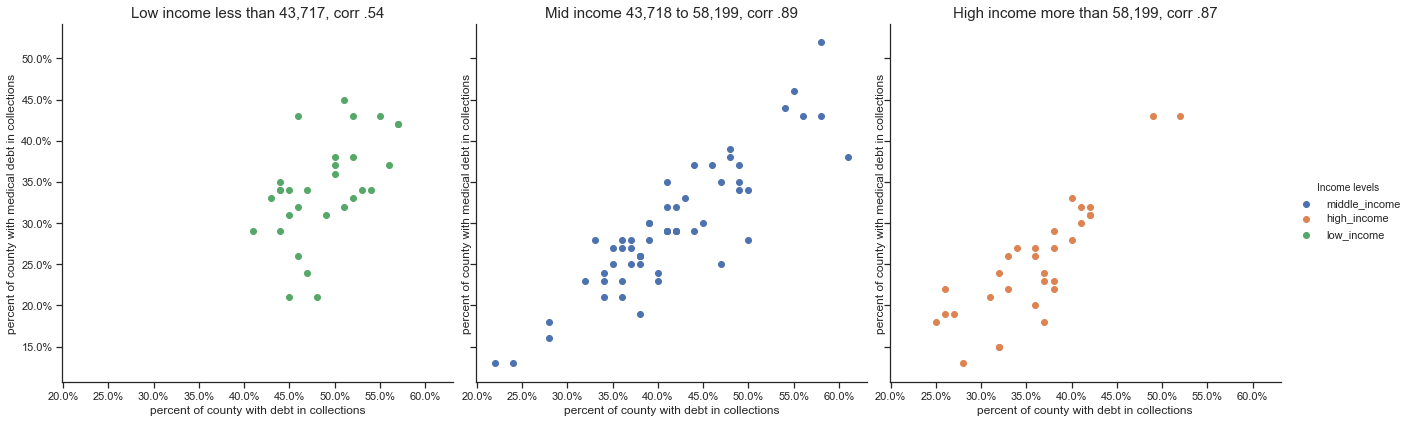

In [77]:
sns.set(style='ticks', rc={'figure.figsize':(11.7,8.27)})
grid1 = sns.FacetGrid(ky_debt_pop_shape_bankruptcy_df_small, col='income_group', hue='income_group', col_wrap=3, size=6, aspect=1, col_order=["low_income", "middle_income", "high_income"])
grid1.map(plt.scatter, 'pct_debt_in_coll','pct_med_debt_in_coll')
grid1.add_legend(ncol=1, title= 'Income levels')
grid1.set(xlabel='percent of county with debt in collections', ylabel='percent of county with medical debt in collections')


for ax in grid1.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_formatter(PercentFormatter(1))


axes = grid1.axes.flatten()
axes[0].set_title("Low income less than 43,717, corr .54", fontsize=15)
axes[1].set_title("Mid income 43,718 to 58,199, corr .89", fontsize=15)
axes[2].set_title("High income more than 58,199, corr .87", fontsize=15)

plt.savefig('images/scatter_facet_debt_med_debt.jpg', dpi=300)

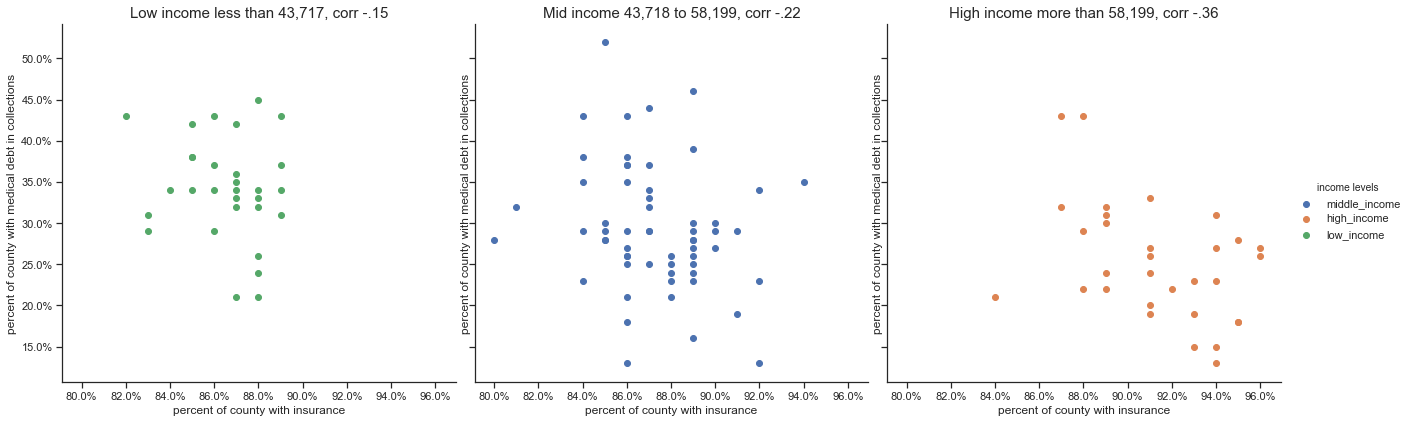

In [78]:
sns.set(style='ticks')
grid1 = sns.FacetGrid(ky_debt_pop_shape_bankruptcy_df_small, col='income_group', hue='income_group', col_wrap=3, height=7, size=6, aspect=1, col_order=["low_income", "middle_income", "high_income"])
grid1.map(plt.scatter, 'pct_overall_with_ins','pct_med_debt_in_coll')
grid1.add_legend(ncol=1, title= 'income levels')
grid1.set(xlabel='percent of county with insurance', ylabel='percent of county with medical debt in collections')

from matplotlib.ticker import PercentFormatter

for ax in grid1.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_formatter(PercentFormatter(1))


axes = grid1.axes.flatten()
axes[0].set_title("Low income less than 43,717, corr -.15", fontsize=15)
axes[1].set_title("Mid income 43,718 to 58,199, corr -.22", fontsize=15)
axes[2].set_title("High income more than 58,199, corr -.36", fontsize=15)

plt.savefig('images/scatter_facet_ins_med_debt.jpg', dpi=300)

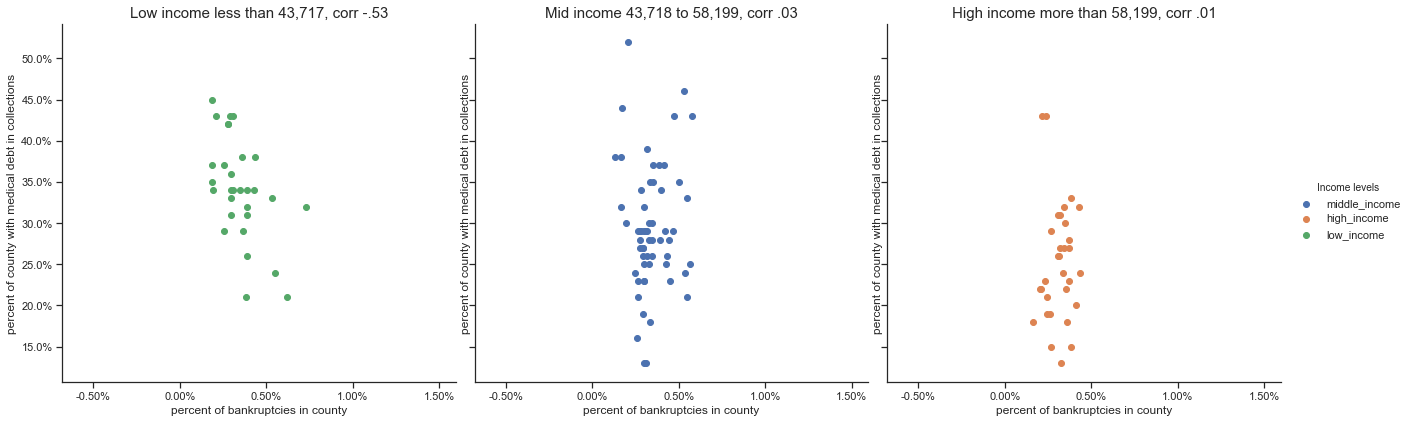

In [79]:
sns.set(style='ticks')
grid1 = sns.FacetGrid(ky_debt_pop_shape_bankruptcy_df_small, col='income_group', hue='income_group', col_wrap=3, size=6, aspect=1, col_order=["low_income", "middle_income", "high_income"])
grid1.map(plt.scatter, 'pct_of_bankruptcies','pct_med_debt_in_coll')
grid1.add_legend(ncol=1, title= 'Income levels')
grid1.set(xlabel='percent of bankruptcies in county', ylabel='percent of county with medical debt in collections')

from matplotlib.ticker import PercentFormatter

for ax in grid1.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_formatter(PercentFormatter(1))


axes = grid1.axes.flatten()
axes[0].set_title("Low income less than 43,717, corr -.53", fontsize=15)
axes[1].set_title("Mid income 43,718 to 58,199, corr .03", fontsize=15)
axes[2].set_title("High income more than 58,199, corr .01", fontsize=15)

plt.savefig('images/scatter_facet_med_debt_bankruptcies.jpg', dpi=300)

### Making the choropleth map

In [80]:
merged_json = json.loads(ky_debt_pop_shape_bankruptcy_df_small.to_json())

In [81]:
json_data = json.dumps(merged_json)

In [82]:
geosource = GeoJSONDataSource(geojson = json_data)

In [83]:
palette = brewer['YlGnBu'][8]

In [84]:
palette = palette[::-1]

In [85]:
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)

In [86]:
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

In [87]:
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

In [88]:
p = figure(title = 'Share of counties with medical debt in collections', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [89]:
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

GlyphRenderer(id='1041', ...)

In [90]:
p.add_layout(color_bar, 'below')

In [91]:
output_notebook()

Loading BokehJS ...

In [92]:
show(p)

### Failed attempt with bokeh above. Below I shall try with plotly

In [110]:
ky_county_map_fips_df = pd.read_excel('./data/KY_FIPS.xlsx')
ky_county_map_fips_df.head()

FIPS    County State
0  21001     Adair    KY
1  21003     Allen    KY
2  21005  Anderson    KY
3  21007   Ballard    KY
4  21009    Barren    KY

In [94]:
ky_county_map_fips_df_r = ky_county_map_fips_df[ky_county_map_fips_df['State'] == 'KY']

In [111]:
ky_county_map_fips_df_r['County'] = ky_county_map_fips_df_r['County'].str.capitalize()
ky_county_map_fips_df_r.head()

FIPS    County State
0  21001     Adair    KY
1  21003     Allen    KY
2  21005  Anderson    KY
3  21007   Ballard    KY
4  21009    Barren    KY

In [112]:
ky_debt_pop_shape_bankruptcy_fips_df = pd.merge(ky_debt_pop_shape_bankruptcy_df,ky_county_map_fips_df_r, on=['County'], how ='inner')
ky_debt_pop_shape_bankruptcy_fips_df.head()


Empty DataFrame
Columns: [State_x, pct_debt_in_coll, median_debt_in_coll, pct_med_debt_in_coll, median_med_debt_in_coll, pct_pop_nonwhite, pct_overall_no_ins, pct_white_no_ins, pct_nonwhite_no_ins, avg_income, avg_income_white, avg_income_nonwhite, pop_2017, geometry, all chapters_non_business, non_business_chapter_7, non_business_chapter_13, FIPS, County, State_y]
Index: []

In [113]:
ky_debt_pop_shape_bankruptcy_fips_df_small =ky_debt_pop_shape_bankruptcy_fips_df[['FIPS','County', 'pct_med_debt_in_coll',
                                 'median_med_debt_in_coll', 'State_x', 'pct_overall_no_ins', 'avg_income', 'pop_2017']] 

ky_debt_pop_shape_bankruptcy_fips_df_small.head()
                                                                         

Empty DataFrame
Columns: [FIPS, County, pct_med_debt_in_coll, median_med_debt_in_coll, State_x, pct_overall_no_ins, avg_income, pop_2017]
Index: []

In [98]:
values = ky_debt_pop_shape_bankruptcy_fips_df_small['pct_med_debt_in_coll'].tolist()


fips = ky_debt_pop_shape_bankruptcy_fips_df_small['FIPS'].tolist()


In [99]:
#endpts = list(np.mgrid[min(values):max(values)])

In [100]:
fig = ff.create_choropleth(fips=fips, values=values, scope=['Kentucky'], county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0}, legend_title='KY: Percent of county with medical debt in collections')

fig.update_layout(
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'})

fig.layout.template = None
fig.show()

In [101]:
ky_debt_pop_shape_bankruptcy_df_small.to_excel("ky_debt_pop_shape_bankruptcy_df_small.xlsx")

In [102]:
ky_debt_pop_shape_bankruptcy_df.to_excel("ky_debt_pop_shape_bankruptcy_df.xlsx")